# DATA EXPLORATION
**Context:** Particulate Matter 2.5 (PM 2.5) Forecasting - Time Series Regression

**Data Exploration** is the first step in the journey of extracting insights from raw datasets. **Data Exploration** serves as the compass that guides we through the vast sea of information. It involves getting to know the data intimately, understanding its structure, and uncovering valuable nuggets that lay hidden beneath the surface.

**Data Exploration** doesn’t stop after the initial stage before feature engineering; it should be performed throughout the entire system development process. After feature construction, we also need to redo EDA to verify whether the processed data is truly clean. Moreover, after building and analyzing the model, it is common to return to EDA to continue uncovering hidden insights within the dataset. The deeper my understanding of the data, the sooner we can explain model behaviors and make appropriate adjustments.

## I. Data Understanding about Raw Dataset
**Familiarization:** Get an overview of the data format, size, and source.

**Variable Identification:** Understand the meaning and purpose of each variable in the dataset.

### 1. Import Libraries and Load Dataset
At the beginning, we need import all necessary libraries as well as load the raw data in folder `data/raw` by `pandas`

#### 1.1 Import Libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..')))
from src import preprocessing as dp

#### 1.2 Load Dataset

In [2]:
path = "../data/raw/vietnam_air_quality.csv"
try:
    df = pd.read_csv(path)
    print("[SUCCESS]: Loading dataset successful")
except Exception as e:
    print(f"[ERROR]: Loading dataset fail: {e}")

[SUCCESS]: Loading dataset successful


#### 2.1 Overview of Data Structure

### 2. Basic Information
In this section, we will focus explore the **overall size of dataset** as well as **meaning of each row represent**


In [3]:
df.head()

,timestamp,city,lat,lon,aqi,pollution_level,pollution_class,temp,humidity,rain,wind_speed,wind_dir,pressure,cloud,pm2_5,pm10,co,no2,o3,so2
0,2023-01-01T00:00,Biên Hòa,10.914111,106.891717,133,Unhealthy for Sensitive,2,23.0,64,0.0,10.3,12,1010.3,100,65.0,95.0,993.0,84.4,25.0,37.5
1,2023-01-01T00:00,Buôn Ma Thuột,12.661262,108.031021,53,Moderate,1,17.7,88,0.3,7.7,101,968.4,100,13.6,23.2,485.0,1.8,105.0,2.2
2,2023-01-01T00:00,Bắc Ninh,21.175170,106.059398,146,Unhealthy for Sensitive,2,11.1,75,0.0,6.2,353,1023.5,0,52.4,74.7,678.0,8.8,58.0,15.4
3,2023-01-01T00:00,Cao Bằng,22.650998,106.259068,82,Moderate,1,10.8,83,0.0,4.6,162,996.6,100,31.9,45.5,528.0,6.4,45.0,7.6
4,2023-01-01T00:00,Cao Lãnh,10.460179,105.612291,86,Moderate,1,24.4,55,0.0,12.0,7,1013.9,100,21.8,32.2,693.0,23.0,47.0,3.3


In [4]:
df.tail()

,timestamp,city,lat,lon,aqi,pollution_level,pollution_class,temp,humidity,rain,wind_speed,wind_dir,pressure,cloud,pm2_5,pm10,co,no2,o3,so2
864989,2025-11-26T00:00,Vĩnh Long,10.252694,105.941002,75,Moderate,1,24.4,72,0.0,11.3,13,1009.0,99,20.4,20.8,391.0,12.4,71.0,14.8
864990,2025-11-26T00:00,Điện Biên Phủ,21.490438,103.104635,53,Moderate,1,9.9,73,0.0,3.6,84,915.1,0,17.1,18.0,227.0,16.6,51.0,9.0
864991,2025-11-26T00:00,Đà Lạt,11.908263,108.457209,53,Moderate,1,15.9,80,0.0,24.0,27,877.4,98,14.4,15.4,214.0,1.7,112.0,1.5
864992,2025-11-26T00:00,Đà Nẵng,16.068000,108.212000,100,Moderate,1,21.0,89,0.2,4.9,360,1015.2,100,16.9,21.7,554.0,1.0,116.0,3.8
864993,2025-11-26T00:00,Đông Hà,16.802493,107.095338,79,Moderate,1,21.2,76,0.0,9.6,6,1014.4,100,30.9,37.1,269.0,5.0,106.0,8.1


#### 2.2 Overview about Size of Dataset

In [5]:
# Display the shape of the dataset
print(f"Data shape: {df.shape}")

num_rows, num_columns = df.shape
# Display rows of the dataset
print(f"Amount of rows is: {num_rows}")

# Display columns of the dataset
print(f"Amount of columns is: {num_columns}")


Data shape: (864994, 20)
Amount of rows is: 864994
Amount of columns is: 20


**In summary:** 
- With size `864994x20` it proved this is a rich dataset, large enough to run accurate predictive models and wide enough for in-depth analysis of the relationship between weather and environmental pollution. 

- Each row represents air quality and weather data for a specific city at a given point in time from **January 1, 2023** to **November 26, 2025**.

### 3. Column Inventory


#### 3.1 Columns of the Dataset

In [6]:
# Display the columns of the dataset
print(f"The dataset columns are: {', '.join(df.columns)}")

The dataset columns are: timestamp, city, lat, lon, aqi, pollution_level, pollution_class, temp, humidity, rain, wind_speed, wind_dir, pressure, cloud, pm2_5, pm10, co, no2, o3, so2


#### 3.2 Meaning and Definition of each Column

- **Time and Position**

|Featute Name|Unit|Meaning|
|:-----------|:---|:------|
|**timestamp**|Datetime|The specific date and time observation (e.g., `2023-01-01T08:00`).|
|**city**|String|The name of the province or city (e.g., `Ha Noi`, `Ho Chi Minh City`).|
|**lat**|Degree|Latitude coordinate of the location.|
|**lon**|Degree|Longitude coordinate of the location.|

- **Pollution Index**

|Featute Name|Unit|Meaning|
|:-----------|:---|:------|
|**aqi**|Index|**Air Quanlity Index (US EPA Standard)**. The target variable representing the overall air quanlity status.|
|**pollution_level**|String|Categorical description of the AQI (e.g., `Good`, `Moderate`, `Unhealthy`).|
|**pollution_class**|Integer|Numerical class label for the AQI (1 to 5).|

- **Weather Factor**

|Featute Name|Unit|Meaning|
|:-----------|:---|:------|
|**temp**|°C|Ambient temperature measured at 2 meters above ground.|
|**humidity**|%|Relative humidity measured at 2 meters above ground.|
|**rain**|mm|Total precipitation (rain, showers, snow) in the preceding hour.|
|**wind_speed**|km/h|Wind speed measured at 10 meters above ground.|
|**wind_dir**|Degree|Wind direction measured at 10 meters (0° = North, 90° = East).|
|**pressure**|hPa|Atmospheric pressure at the surface level.|
|**cloud**|%|Total cloud cover percentage (0% = clear sky, 100% = overcast).|

- **Pollution Concentration**

|Featute Name|Unit|Meaning|
|:-----------|:---|:------|
|**pm2_5**|$\mu g/m^{3}$|Concentration of Particulate Matter < 2.5 micrometers (Fine dust). The main driver of AQI.|
|**pm10**|$\mu g/m^{3}$|Concentration of Particulate Matter < 10 micrometers (Coarse dust).|
|**co**|$\mu g/m^{3}$|Concentration of Carbon Monoxide.|
|**no2**|$\mu g/m^{3}$|Concentration of Nitrogen Dioxide.|
|**o3**|$\mu g/m^{3}$|Concentration of Ozone.|
|**so2**|$\mu g/m^{3}$|Concentration of Sulphur Dioxide.|

Data Types

In [7]:
# Display data types of each column
df.dtypes

timestamp           object
city                object
lat                float64
lon                float64
aqi                  int64
pollution_level     object
pollution_class      int64
temp               float64
humidity             int64
rain               float64
wind_speed         float64
wind_dir             int64
pressure           float64
cloud                int64
pm2_5              float64
pm10               float64
co                 float64
no2                float64
o3                 float64
so2                float64
dtype: object

**In summary**:
- Most columns are very important:
    - **Pollutants (pm2_5, pm10, no2,...)**: These are the direct causes of the AQI index. Analyzing them helps to understand the sources of pollution.
    - **Meteorological factors (temp, wind, rain...)**: These are crucial for correlation analysis. For example, strong winds can dilute dust (decreasing AQI), while high humidity can trap dust (increasing AQI).
    - **Time & Location (timestamp, city)**: These are necessary for trend analysis over time and geographic comparison (geospatial analysis).

- Columns `lat` and `lon` should be dropped because when they serve as proxies for the location, which is now explicitly represented by the `city` column derived from the API mapping process

- Through step **Data Collection** from API, most of columns have **right datatype already**

-  The `timestamp` column is currently of type `object` and should be converted to `datetime` for proper time series analysis and it will execute in step **Data Preprocessing**

### 4. Duplicated Row

In [8]:
duplicated_rows = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_rows}")

Number of duplicated rows: 0


**In summary**: The result of `df.duplicated().sum()` being `0` is a **good sign**, and the reason is very simple:

- The collabroration of columns about **time and position** inclued in: `timestamp`, `city`, `lat`, `lon` which creates a unique identifier for each row

- **Logic**: Data for a given point in day (for example: **2023-01-01T00:00**) and a given city (for example: **Hà Nội**) can only have one unique set of air quality indices.

### 5. Missing Data

#### 5.1 Explicit Missing Data Check (Column-wise)
**Objective**: To detect technically missing values (e.g., NaN, Null, None) recognized by the system. This step scans all columns to ensure that every existing row contains populated fields.

In [9]:
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"'{col}': {missing_percentage:.2f}%")

'timestamp': 0.00%
'city': 0.00%
'lat': 0.00%
'lon': 0.00%
'aqi': 0.00%
'pollution_level': 0.00%
'pollution_class': 0.00%
'temp': 0.00%
'humidity': 0.00%
'rain': 0.00%
'wind_speed': 0.00%
'wind_dir': 0.00%
'pressure': 0.00%
'cloud': 0.00%
'pm2_5': 0.00%
'pm10': 0.00%
'co': 0.00%
'no2': 0.00%
'o3': 0.00%
'so2': 0.00%


#### 5.2 Implicit Missing Data & Data Validity Check

**Objective**  
The goal of this step is to detect *implicit missing values* and *physically invalid data*—values that are technically present in the dataset but semantically meaningless or impossible under real-world conditions.


##### 5.2.1 Categorical Anomalies Detection

Categorical (object-type) variables are examined to identify entries that act as placeholders for missing data. These include:
- Empty strings (`""`) or values containing only whitespace  
- Common missing-value keywords such as `nan`, `null`, `unknown`, `n/a`, and `?`

Such values are flagged because they can silently propagate errors during encoding and bias downstream analysis if treated as valid categories.


##### 5.2.2 Numerical Range and Sign Constraints

Numerical variables are validated against known physical and logical constraints:

- **Bounded ranges**  
  - Humidity and cloud coverage are constrained to the interval \([0, 100]\)

- **Physically unlikely zero values**  
  - Atmospheric pressure, latitude, and longitude should not be equal to zero under realistic conditions

- **Non-negativity constraints**  
  - Environmental and air quality variables (rainfall, wind speed, AQI, PM2.5, PM10, CO, NO₂, O₃, SO₂) must not take negative values

Values violating these constraints are flagged as physically implausible and likely indicate data collection or encoding errors.

##### 5.2.3 Cross-variable Physical Consistency Checks

In addition to individual variable validation, logical consistency between related variables is enforced:

- **PM2.5–PM10 consistency**  
  - PM2.5 must not exceed PM10, as PM2.5 represents a subset of particulate matter included in PM10 measurements

- **Suspicious zero particulate concentrations**  
  - Records where PM2.5 or PM10 equals zero are flagged, as such values often reflect sensor malfunction or implicitly encoded missing data rather than true zero concentrations



In [10]:
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    empty_mask = df[col].astype(str).str.strip() == '' # Check empty string hoặc or whitespace
    # Check keyword
    garbage_mask = df[col].astype(str).str.lower().isin(['nan', 'null', 'unknown', 'n/a', '?'])
    
    count_invalid = (empty_mask | garbage_mask).sum()
    if count_invalid > 0:
        print(f"Column '{col}': Contains {count_invalid} invalid entries (empty/unknown).")

numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if col in ['humidity', 'cloud']: # Must be in range 0-100
        out_of_range = ((df[col] < 0) | (df[col] > 100)).sum()
        if out_of_range > 0:
            print(f"Column {col}: Found {out_of_range} rows out of range [0, 100].")

    if col in ['pressure', 'lat', 'lon']: # Check zero number in columns dont should have zero number
        zeros = (df[col] == 0).sum()
        if zeros > 0: 
            print(f"Column {col}: Contains {zeros} zeros (physically unlikely).")
    
    # Check negative number
    if col in ['rain', 'wind_speed', 'pressure', 'aqi', 
                'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2']: 
        negatives = (df[col] < 0).sum()
        if negatives > 0: 
            print(f"Column '{col}': Contains {negatives} negative values.")

# PM2.5 must is subset of PM10
if 'pm2_5' in df.columns and 'pm10' in df.columns:
    pm_logic_error = len(df[df['pm2_5'] > df['pm10']])
    print(f"PM Logic: Found {pm_logic_error} rows where PM2.5 > PM10 (Physically impossible).")

    # Check PM2.5 or PM10 equals zero
    pm_zero_mask = (df['pm2_5'] == 0) | (df['pm10'] == 0)
    pm_zero_count = pm_zero_mask.sum()
    if pm_zero_count > 0:
        print(f"PM Zero Check: Found {pm_zero_count} rows where PM2.5 or PM10 equals 0 (suspicious values).")
    
print("Implicit check completed.")

PM Logic: Found 93 rows where PM2.5 > PM10 (Physically impossible).
PM Zero Check: Found 2 rows where PM2.5 or PM10 equals 0 (suspicious values).
Implicit check completed.


#### 5.3 Structural Checking
**Objective:** Identify records (rows) that are completely missing at specific time points. In **Iime-series data**, a perfect dataset is continuous.

**Method:** Compare the **actual dataset** with the **Cartesian Product (All Hours × All Cities)**.

In [11]:
cities = df['city'].unique()

# Parse temp timestamp
temp_ts = pd.to_datetime(df['timestamp']) 
start_date = temp_ts.min()
end_date = temp_ts.max()

# Create time frame (reference)
all_hours = pd.date_range(
    start=start_date, 
    end=end_date, 
    freq='h'
)

# Create Cartesian Product table from Day x Hour x City
expected_index = pd.MultiIndex.from_product(
    [all_hours, cities],
    names=['timestamp', 'city']
)

expected_rows = len(expected_index)
missing_rows = expected_rows - num_rows

print(f"--- RANGE OF CHECKING ---")
print(f"From: {start_date} to: {end_date}")
print(f"Number of city: {len(cities)}")
print(f"Number of expected row: {len(expected_index):,}")
print(f"Number of actually row: {num_rows:,}")
print(f"Number of missing rows is: {missing_rows:,}")


--- RANGE OF CHECKING ---
From: 2023-01-01 00:00:00 to: 2025-11-26 00:00:00
Number of city: 34
Number of expected row: 864,994
Number of actually row: 864,994
Number of missing rows is: 0


**In summary**
The dataset demonstrates **exceptional structural integrity and completeness**. The time series is continuous across all 34 cities from *Jan 01, 2023, to Nov 26, 2025*, with no explicit missing values found. However, a minor logical anomaly regarding Particulate Matter (PM) physics was detected in a small subset of the data, which requires correction during the preprocessing phase.

There are some detailed inspection results:

1. **Explicit Missing Data**
   - **Status:** Clean (**0% missing**).
   - **Observation:** All critical features (timestamp, geospatial data, weather metrics, and pollutants) contain full entries.

2. **Implicit & Logical Check**
   - **Status:** Mostly Valid.
   - **Observation:** No empty strings, garbage characters, or physically impossible values (negatives, inappropriate zeros) but found **93 rows** where `PM2.5 > PM10`..

3. **Structural Integrity**
   - **Status:** Complete (No missing rows).
   - **Observation:** The dataset perfectly matches the expected Cartesian product of *Time × City* (864,994 rows). There are no time gaps or disconnected records.

**Anomaly Analysis: PM Logic Violation**
**Observation:** There are 93 instances where the concentration of PM2.5 (fine particles) exceeds PM10 (coarse particles). Physically, PM2.5 is a subset of PM10; therefore, the condition $PM2.5 \le PM10$ must always hold true.

**Potential Causes:**
- **Sensor Noise/Glitch:** Temporary malfunction in the PM10 optical sensor.

- **Synchronization Lag:** The device might sample PM2.5 and PM10 at slightly different milliseconds. During rapid air quality changes (e.g., a sudden gust of wind), this lag can cause a mismatch.

**Impact**
Although small in quantity (93 vs. 865k rows), these data points represent **noise** that can negatively affect model convergence and statistical distributions if left untreated. 

Therefore, we will address the *PM2.5 > PM10* anomaly in the upcoming **Data Preprocessing** phase using **Interpolation**.

## II. Data Understanding about Processed Data

### 1. Load Processed Data

In [12]:
path = "../data/processed/processed_data.csv"
try:
    df_processed = pd.read_csv(path, parse_dates=['timestamp'])
    print("[SUCCESS]: Loading dataset successful")
except Exception as e:
    print(f"[ERROR]: Loading dataset fail: {e}")

[SUCCESS]: Loading dataset successful


### 2. Basic Information
Similarity to **Data Understanding about Raw Dataset** we need explore about the size as well as the structure about the dataset after preprocessing

#### 2.1 Overview of Data Structure

In [13]:
df_processed.head()

,timestamp,city,aqi,pollution_level,pollution_class,temp,humidity,rain,wind_speed,wind_dir,pressure,cloud,pm2_5,pm10,co,no2,o3,so2
0,2023-01-01,Biên Hòa,133,Unhealthy for Sensitive,2,23.0,64,0.0,10.3,12,1010.3,100,65.0,95.0,993.0,84.4,25.0,37.5
1,2023-01-01,Buôn Ma Thuột,53,Moderate,1,17.7,88,0.3,7.7,101,968.4,100,13.6,23.2,485.0,1.8,105.0,2.2
2,2023-01-01,Bắc Ninh,146,Unhealthy for Sensitive,2,11.1,75,0.0,6.2,353,1023.5,0,52.4,74.7,678.0,8.8,58.0,15.4
3,2023-01-01,Cao Bằng,82,Moderate,1,10.8,83,0.0,4.6,162,996.6,100,31.9,45.5,528.0,6.4,45.0,7.6
4,2023-01-01,Cao Lãnh,86,Moderate,1,24.4,55,0.0,12.0,7,1013.9,100,21.8,32.2,693.0,23.0,47.0,3.3


#### 2.2 Overview about Size of Dataset

In [14]:
# Display the shape of the dataset
print(f"Data shape: {df_processed.shape}")

num_rows, num_columns = df_processed.shape
# Display rows of the dataset
print(f"Amount of rows is: {num_rows}")

# Display columns of the dataset
print(f"Amount of columns is: {num_columns}")


Data shape: (864994, 18)
Amount of rows is: 864994
Amount of columns is: 18


**In summary:**
- After removing the two location-related features (latitude and longitude), the number of remaining features is reduced to 18, compared to 20 columns in the original raw dataset.

### 3. Column Inventory

#### 3.1 Column of the Dataset

In [15]:
# Display the columns of the dataset
print(f"The dataset columns are: {', '.join(df_processed.columns)}")

The dataset columns are: timestamp, city, aqi, pollution_level, pollution_class, temp, humidity, rain, wind_speed, wind_dir, pressure, cloud, pm2_5, pm10, co, no2, o3, so2


#### 3.2 Data Type

In [16]:
# Display data types of each column
df_processed.dtypes

timestamp          datetime64[ns]
city                       object
aqi                         int64
pollution_level            object
pollution_class             int64
temp                      float64
humidity                    int64
rain                      float64
wind_speed                float64
wind_dir                    int64
pressure                  float64
cloud                       int64
pm2_5                     float64
pm10                      float64
co                        float64
no2                       float64
o3                        float64
so2                       float64
dtype: object

**In summary:** The current data types are appropriately assigned and consistent with the semantic meaning of each column in the processed dataset.

## III. Columns Analysis 


### 1. Numerical Columns Analysis

#### 1.1 Numerical Columns in Dataset

In [17]:
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
print(f"There are {len(numeric_cols)} numeric columns.")
print(numeric_cols)

There are 15 numeric columns.
['aqi', 'pollution_class', 'temp', 'humidity', 'rain', 'wind_speed', 'wind_dir', 'pressure', 'cloud', 'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2']


#### 1.2 Value Distribution

In [18]:
df_processed2 = df_processed[numeric_cols].copy()
df_processed2.describe().T

,count,mean,std,min,25%,50%,75%,max
aqi,864994.0,77.597932,37.503329,9.0,52.0,68.0,96.0,346.0
pollution_class,864994.0,1.069669,0.830173,0.0,1.0,1.0,1.0,5.0
temp,864994.0,24.836440,4.975442,2.9,22.0,25.3,28.1,41.6
humidity,864994.0,79.858127,14.887011,12.0,71.0,83.0,92.0,100.0
rain,864994.0,0.264235,1.061333,0.0,0.0,0.0,0.1,49.1
wind_speed,864994.0,8.744939,5.427078,0.0,4.6,7.6,11.9,128.3
wind_dir,864994.0,162.703037,97.954400,0.0,84.0,150.0,238.0,360.0
pressure,864994.0,990.092590,35.186982,870.4,985.5,1005.5,1010.1,1033.7
cloud,864994.0,74.457233,35.881370,0.0,48.0,99.0,100.0,100.0
pm2_5,864992.0,24.863711,20.565050,0.1,11.6,19.1,31.7,737.6


**In summary:**
1. `aqi`:
- The average AQI value is approximately **77.60**, indicating generally **moderate air pollution levels**.
- AQI values range from **9** to **346**, reflecting substantial variation in air quality conditions.
- 50% of observations have AQI values between **52** and **96** (from the 25th to 75th percentile).
- The standard deviation is **~37.50**, suggesting high variability driven by pollution spikes.

2. `pollution_class`:
- The average pollution class is approximately **1.07**, indicating that most observations fall into lower pollution categories.
- Values range from **0** to **5**, covering all defined pollution severity levels.
- 50% of observations fall between **1** and **1**, showing strong concentration around a single class.
- The standard deviation is **~0.83**, suggesting limited dispersion.

3. `temp`:
- The average temperature is approximately **24.84°C**, consistent with a tropical climate.
- Temperature values range from **2.9°C** to **41.6°C**, indicating occasional extreme conditions.
- 50% of observations fall between **22.0°C** and **28.1°C**.
- The standard deviation is **~4.98**, suggesting moderate variability.

4. `humidity`:
- The average humidity level is approximately **79.86%**, indicating generally moist atmospheric conditions.
- Humidity values range from **12%** to **100%**.
- 50% of observations fall between **71%** and **92%**.
- The standard deviation is **~14.89**, showing moderate dispersion.

5. `rain`:
- The average rainfall is approximately **0.26 mm**, indicating that most periods experience little or no rain.
- Rainfall values range from **0** to **49.1 mm**, reflecting occasional heavy precipitation.
- 50% of observations fall between **0** and **0.1 mm**.
- The standard deviation is **~1.06**, indicating a highly right-skewed distribution.

6. `wind_speed`:
- The average wind speed is approximately **8.74 m/s**.
- Wind speed values range from **0** to **128.3 m/s**, indicating the presence of extreme outliers.
- 50% of observations fall between **4.6** and **11.9 m/s**.
- The standard deviation is **~5.42**, suggesting moderate to high variability.


7. `wind_dir`:
- The average wind direction is approximately **162.7°**, representing a broad directional distribution.
- Wind direction values range from **0°** to **360°**, covering all possible directions.
- 50% of observations fall between **84°** and **238°**.
- The standard deviation is **~97.95**, indicating wide dispersion.

8. `pressure`:
- The average atmospheric pressure is approximately **990.09 hPa**, indicating relatively stable conditions.
- Pressure values range from **870.4 hPa** to **1033.7 hPa**.
- 50% of observations fall between **985.5 hPa** and **1010.1 hPa**.
- The standard deviation is **~35.19**, suggesting limited variability.

9. `cloud`:
- The average cloud cover is approximately **74.46%**, indicating generally cloudy conditions.
- Cloud values range from **0%** to **100%**.
- 50% of observations fall between **48%** and **100%**.
- The standard deviation is **~35.88**, reflecting high variability.


10. `pm2_5`:
- The average PM2.5 concentration is approximately **24.86 µg/m³**.
- Values range from **0** to **737.6 µg/m³**, indicating extreme pollution events.
- 50% of observations fall between **11.6** and **31.7 µg/m³**.
- The standard deviation is **~20.57**, suggesting high dispersion.

11. `pm10`:
- The average PM10 concentration is approximately **32.58 µg/m³**.
- Values range from **0** to **1061.7 µg/m³**.
- 50% of observations fall between **16.1** and **41.7 µg/m³**.
- The standard deviation is **~25.42**, indicating substantial variability.

12. `co`:
- The average CO concentration is approximately **386.80**.
- CO values range from **71** to **5784**, showing extreme right-skewness.
- 50% of observations fall between **230** and **470**.
- The standard deviation is **~246.05**, indicating high variability.

13. `no2`:
- The average NO₂ concentration is approximately **11.62**.
- Values range from **0** to **162.5**.
- 50% of observations fall between **3.2** and **15.0**.
- The standard deviation is **~13.03**, showing significant dispersion.

14. `o3`:
- The average O₃ concentration is approximately **72.96**.
- Values range from **0** to **479**.
- 50% of observations fall between **44** and **95**.
- The standard deviation is **~40.47**, indicating high variability.

15. `so2`:
- The average SO₂ concentration is approximately **11.53**.
- Values range from **0** to **236.5**.
- 50% of observations fall between **3.0** and **16.5**.
- The standard deviation is **~12.01**, suggesting notable dispersion.


#### 1.3 Visualization Distribution

In [19]:
palette = sns.color_palette("Set2", len(numeric_cols))
sns.set_style("whitegrid")

def plot_numerical_distribution_and_boxplot(col, i):
    color = palette[i]
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(
        data=df_processed,
        x=col,
        kde=True,
        bins=40,
        ax=axes[0],
        color=color,
        edgecolor="white"
    )
    axes[0].set_title(f'Distribution of {col}', fontsize=13, weight='bold')
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(
        data=df_processed,
        x=col,
        ax=axes[1],
        color=color,
        width=0.4
    )
    axes[1].set_title(f'Box Plot of {col}', fontsize=13, weight='bold')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

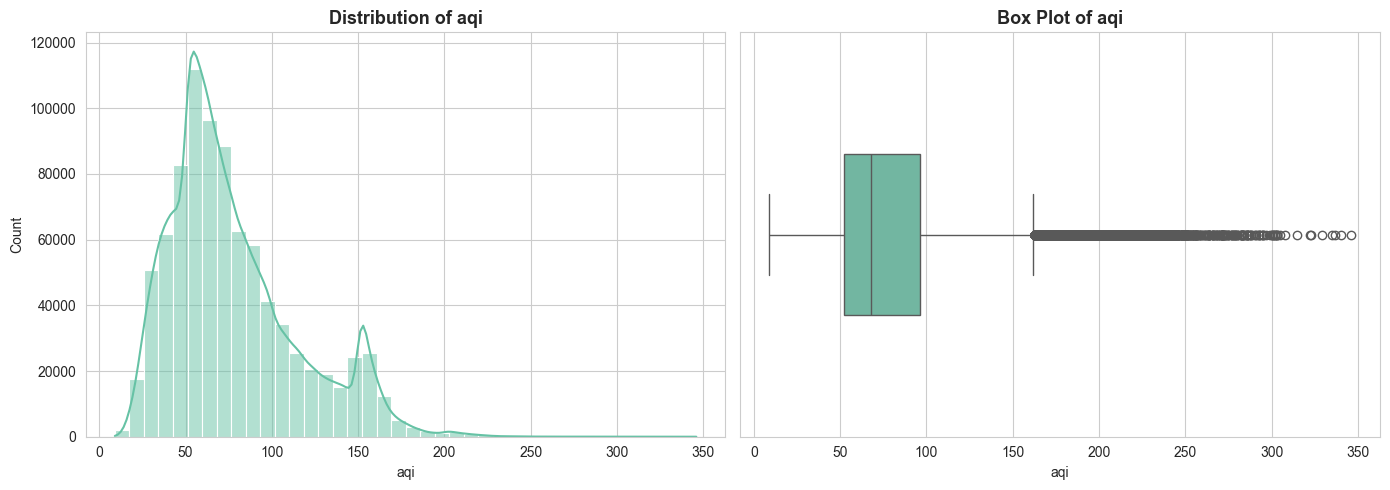

In [20]:
plot_numerical_distribution_and_boxplot(numeric_cols[0], 0)

**In summary:**
- The distribution of `aqi` is **right-skewed**, with most values concentrated between **50 and 100**, indicating that air quality is generally at a **moderate level** across the majority of observations.
- The box plot reveals a substantial number of **high-value outliers** (above **150**), representing periods of **severe air pollution events**.
- Although these extreme AQI values are relatively infrequent, they contribute significantly to overall variability and emphasize the importance of monitoring pollution spikes rather than relying solely on average conditions.

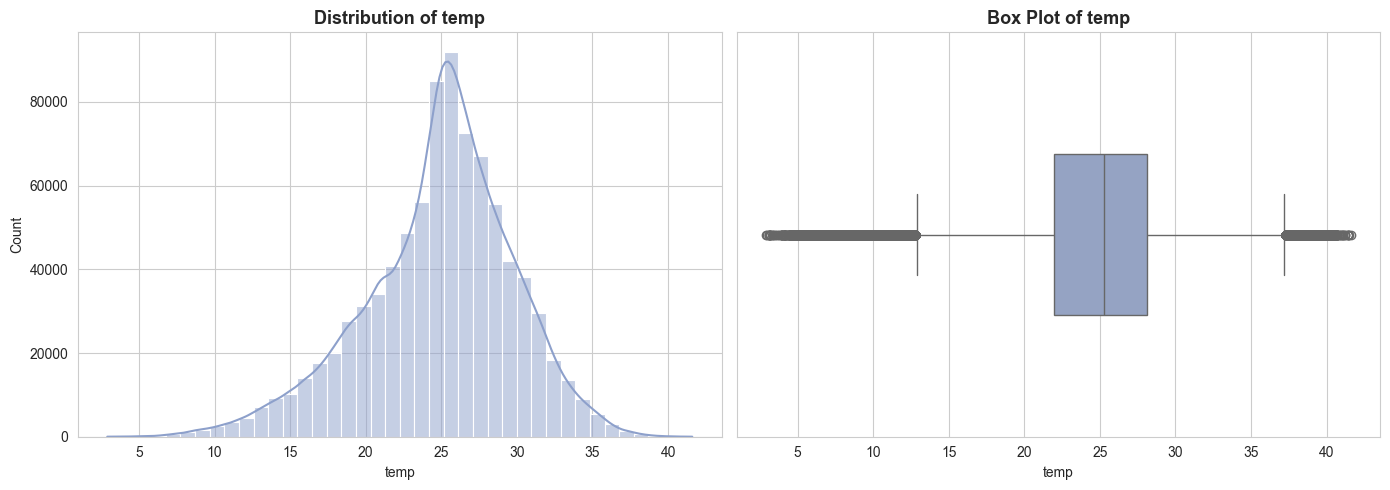

In [21]:
plot_numerical_distribution_and_boxplot(numeric_cols[2], 2)

**In summary:**
- The distribution of `temp` is approximately **bell-shaped and close to normal**, with most values concentrated between **20°C and 30°C**, indicating relatively stable temperature conditions.
- The box plot shows the presence of several **low and high temperature outliers** (below **10°C** and above **35°C**), representing occasional extreme weather conditions.
- These outliers are relatively infrequent and do not significantly distort the central distribution, but they highlight periods of unusual temperature that may influence environmental and air quality dynamics.

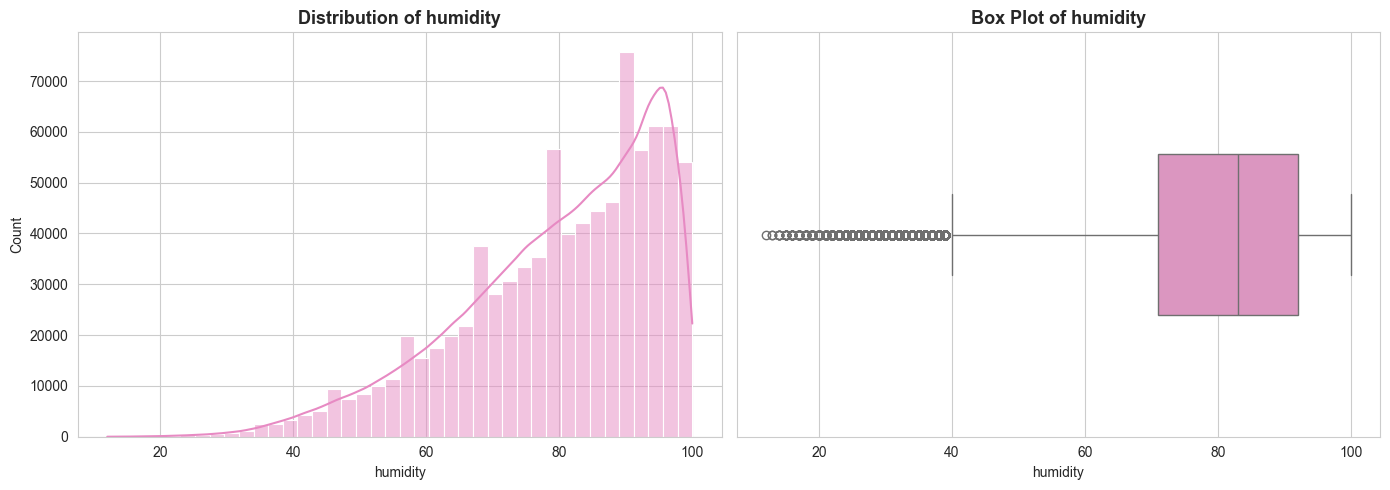

In [22]:
plot_numerical_distribution_and_boxplot(numeric_cols[3], 3)

**In summary:**
- The distribution of `humidity` is **left-skewed**, with most values concentrated at **high humidity levels (70–100%)**, indicating generally moist atmospheric conditions.
- The box plot reveals the presence of several **low-humidity outliers** (below **40%**), representing relatively dry and less frequent weather conditions.
- These low-humidity outliers are comparatively rare and do not substantially affect the overall distribution, but they highlight occasional deviations from the dominant humid climate pattern.

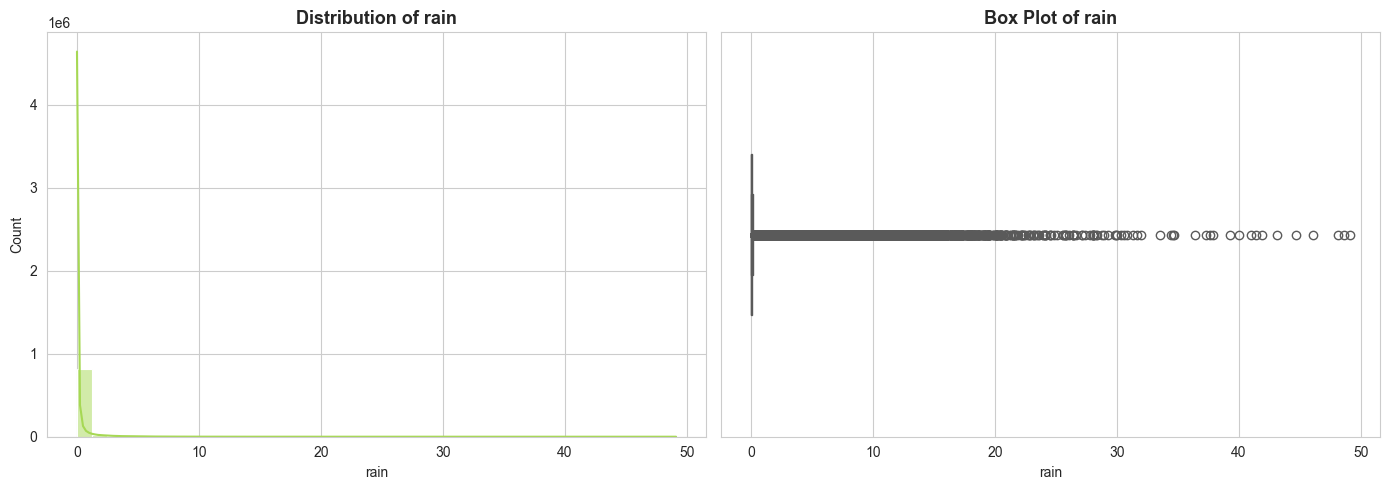

In [23]:
plot_numerical_distribution_and_boxplot(numeric_cols[4], 4)

**In summary:**
- The distribution of `rain` is **highly right-skewed**, with the vast majority of observations clustered near **0 mm**, indicating that most time periods experience little to no rainfall.
- The box plot reveals a large number of **high-value outliers** extending up to approximately **50 mm**, representing **occasional heavy rainfall events**.
- Although these extreme rainfall values occur infrequently, they dominate the overall variability and suggest that precipitation patterns are driven primarily by rare but intense rain episodes.

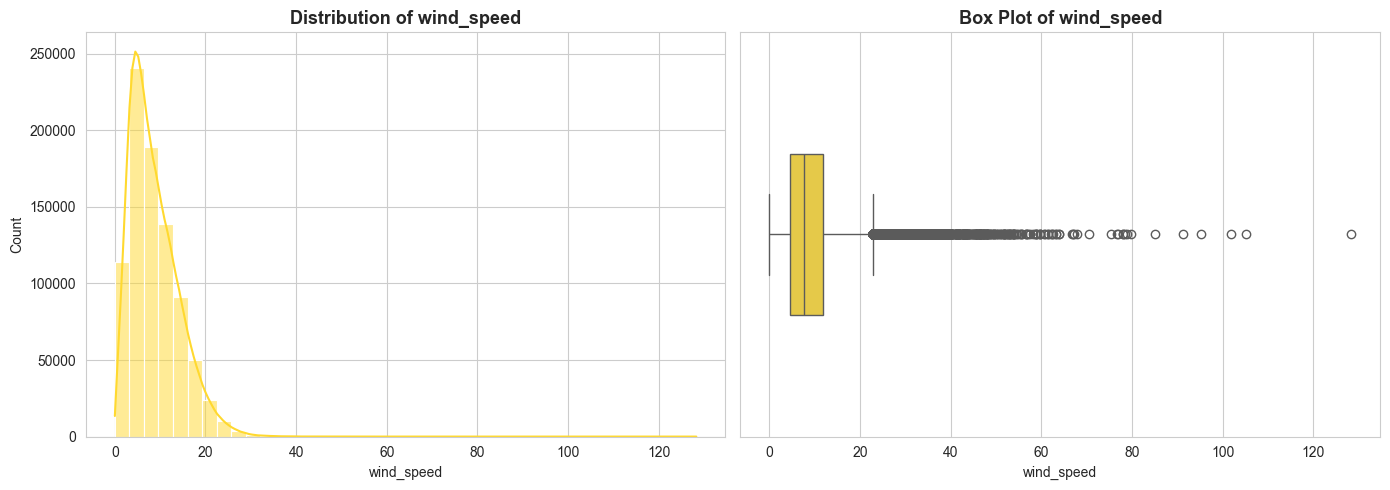

In [24]:
plot_numerical_distribution_and_boxplot(numeric_cols[5], 5)

**In summary:**
- The distribution of `wind_speed` is **strongly right-skewed**, with most values concentrated at **low wind speeds (approximately 0–15 m/s)**, indicating generally calm to moderate wind conditions.
- The box plot reveals numerous **high-value outliers** extending beyond **30 m/s**, representing rare but **extreme wind events**.
- Although these extreme wind speeds occur infrequently, they contribute substantially to overall variability and may have significant impacts on weather dynamics and pollutant dispersion.

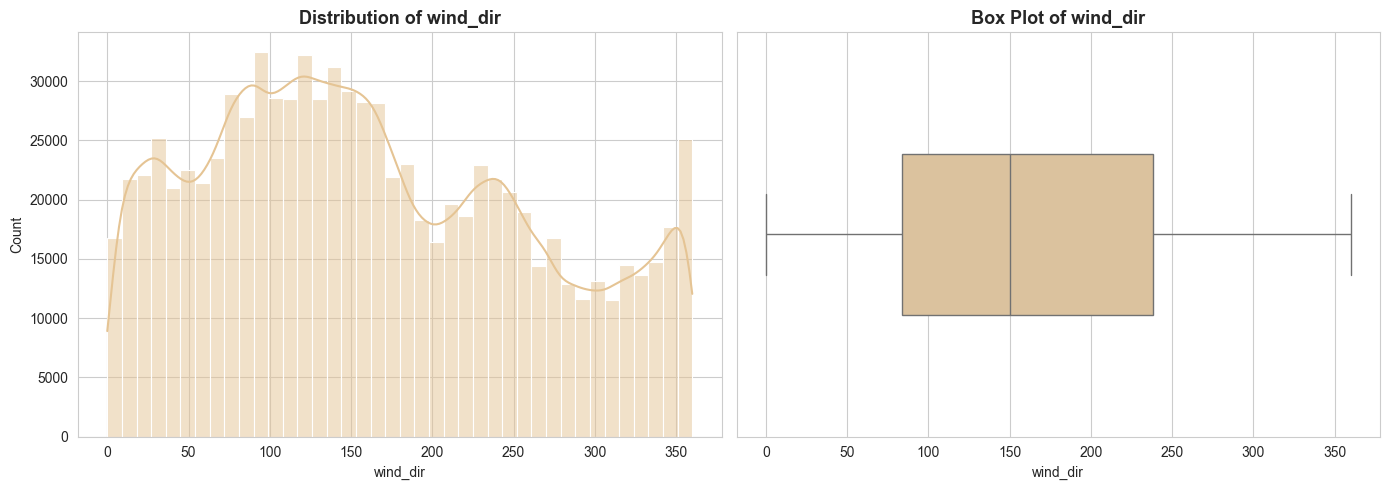

In [25]:
plot_numerical_distribution_and_boxplot(numeric_cols[6], 6)

**In summary:**
- The distribution of `wind_dir` is **widely spread across the full 0–360° range**, indicating that wind directions are highly variable and occur from nearly all possible directions.
- The histogram shows multiple local peaks rather than a single dominant direction, suggesting the absence of a strongly prevailing wind direction.
- The box plot reflects a broad interquartile range with no extreme outliers, indicating that wind direction values are evenly dispersed rather than driven by rare anomalies.

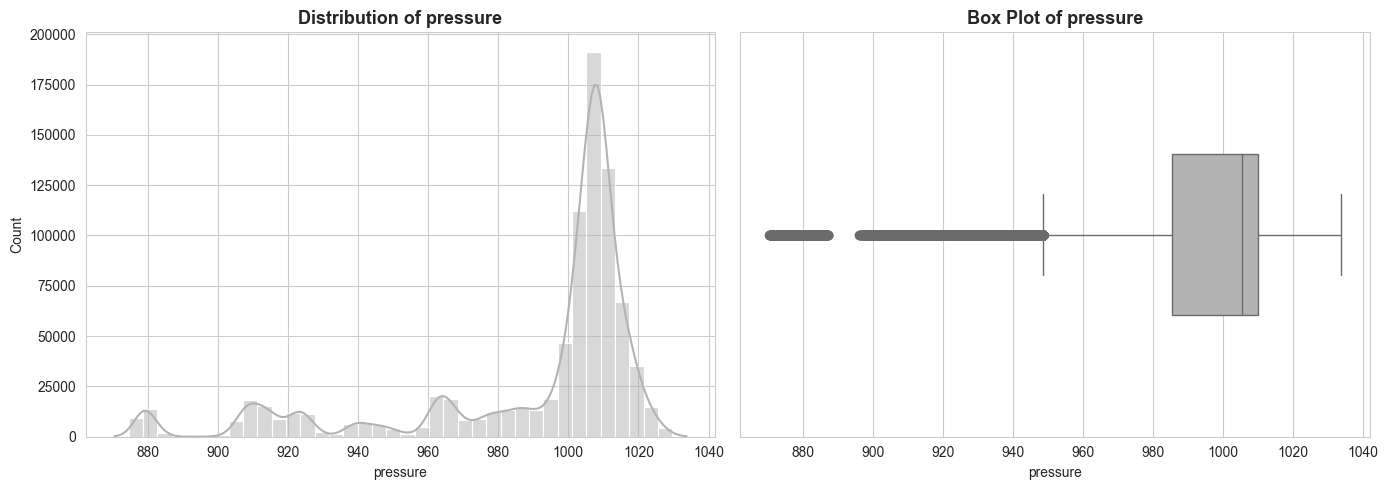

In [26]:
plot_numerical_distribution_and_boxplot(numeric_cols[7], 7)

**In Summary:**
- The distribution of `pressure` is **unimodal** with a **sharp central peak**, indicating that most observations are tightly clustered around a typical pressure value.
- It exhibits a **slight left-skewed shape**, as the lower-pressure tail extends further than the higher-pressure side.
- Overall, the distribution is **approximately normal**, with mild asymmetry driven by occasional low-pressure events.

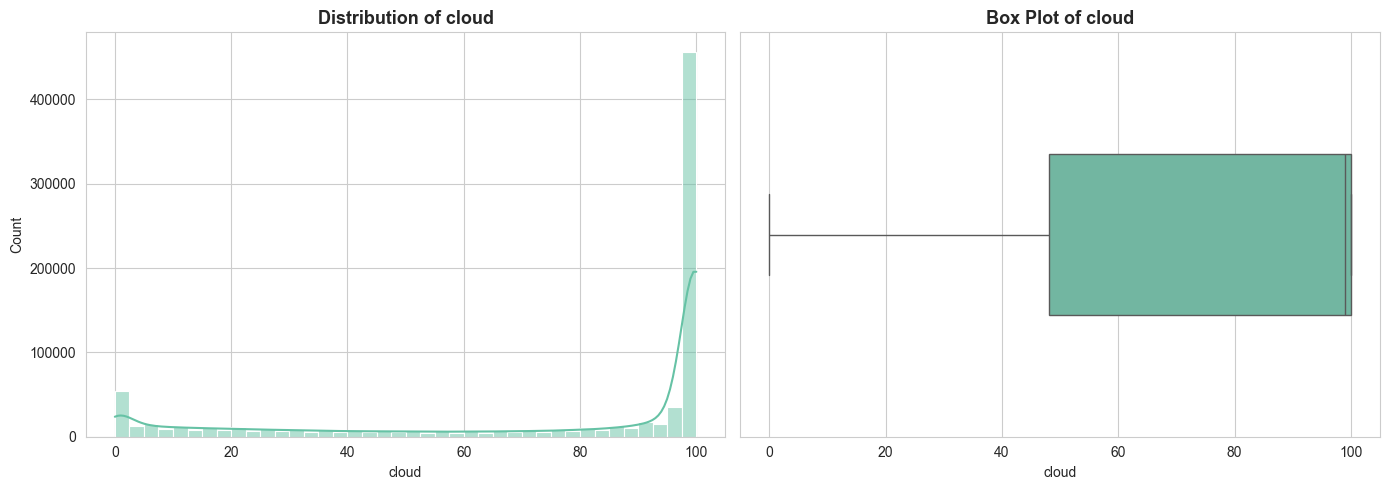

In [27]:
plot_numerical_distribution_and_boxplot(numeric_cols[8], 8)

**In Summary:**
- The distribution of `cloud` is **strongly left-skewed**, with a large concentration of values near **100% cloud cover**, indicating predominantly cloudy conditions.
- The histogram shows a sharp peak at the upper bound, suggesting that **fully overcast conditions** occur very frequently.
- The box plot reflects a wide interquartile range extending toward high values, with relatively few low-cloud observations contributing to the long left tail.

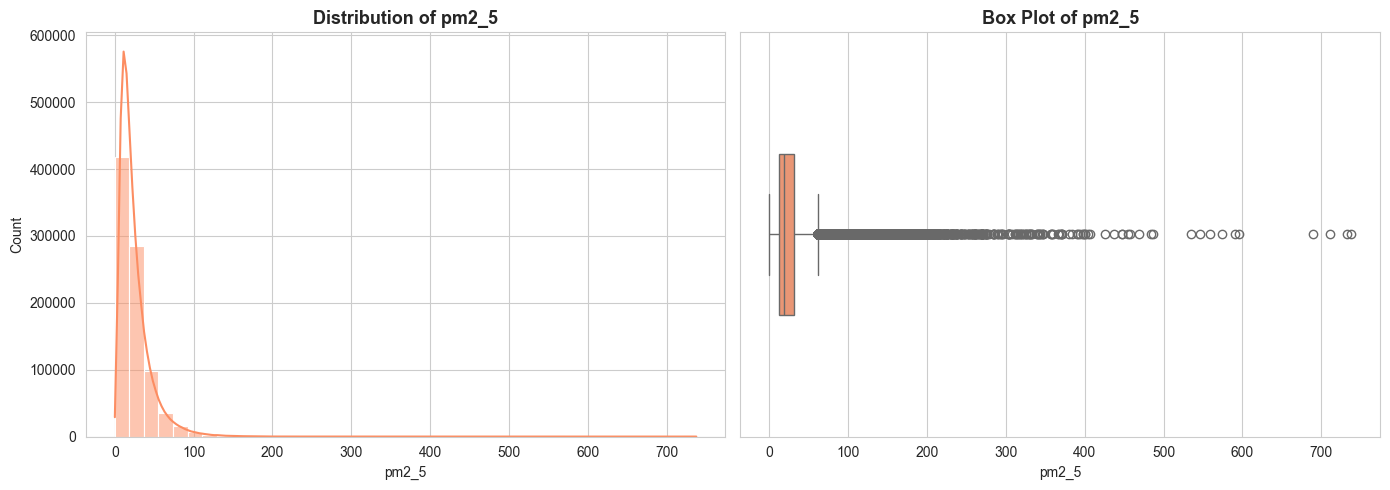

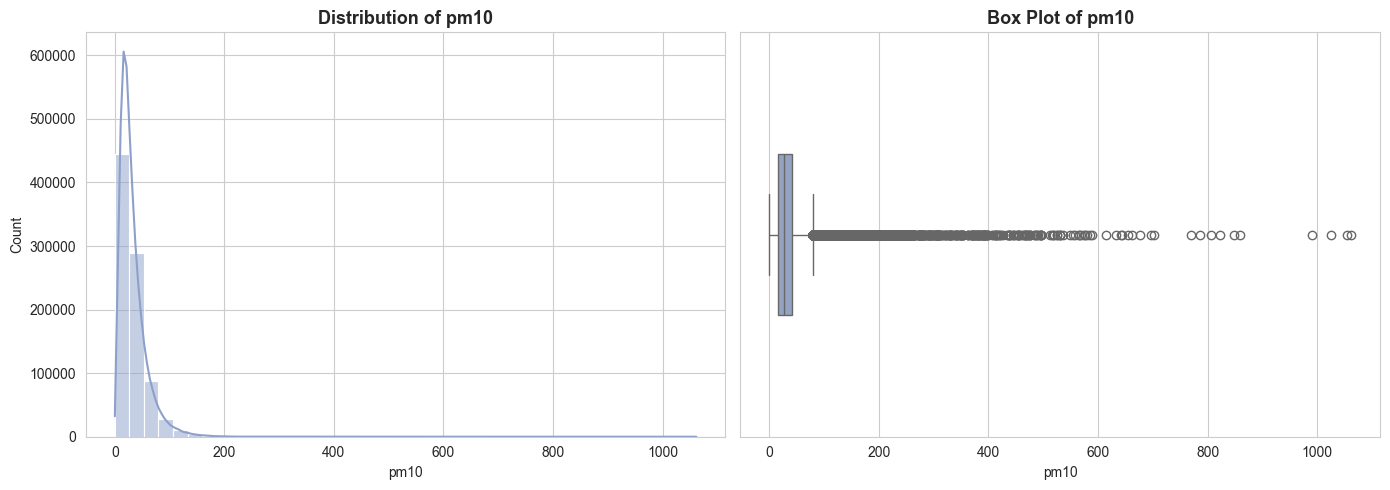

In [28]:
plot_numerical_distribution_and_boxplot(numeric_cols[9], 9)
plot_numerical_distribution_and_boxplot(numeric_cols[10], 10)

**In Summary:**
- Both `pm2_5` and `pm10` exhibit **strongly right-skewed distributions**, with the majority of observations concentrated at **low concentration levels**, while a long right tail reflects extreme pollution events.
- The histograms show sharp peaks near the lower end, indicating that **normal air quality conditions are common**, whereas the box plots reveal a large number of **high-value outliers**, representing severe but infrequent pollution episodes.
- These extreme values substantially increase overall variability, suggesting that particulate matter pollution is driven more by **sporadic spikes** rather than consistently high baseline levels.

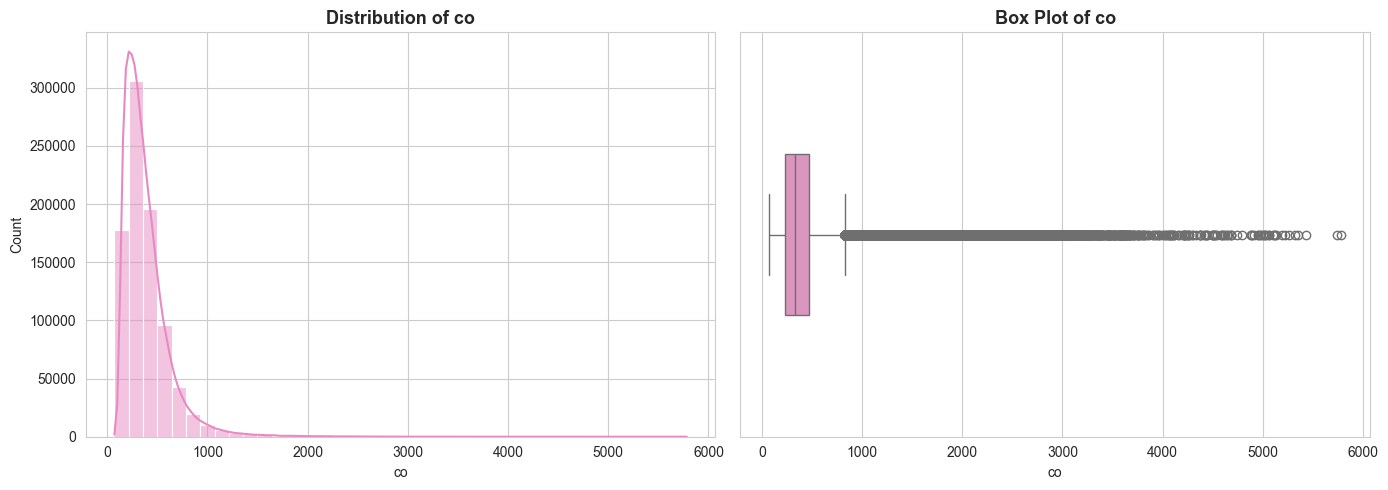

In [29]:
plot_numerical_distribution_and_boxplot(numeric_cols[11], 11)

**In Summary:**
- The distribution of `co` is **strongly right-skewed**, with most observations concentrated at **low CO concentrations**, indicating that normal conditions are generally within safe or moderate levels.
- The histogram shows a sharp peak near the lower end, while the long right tail reflects **extreme CO concentration spikes**.
- The box plot reveals a large number of **high-value outliers**, suggesting that although high CO levels are infrequent, they significantly contribute to overall variability and represent potentially hazardous pollution events.

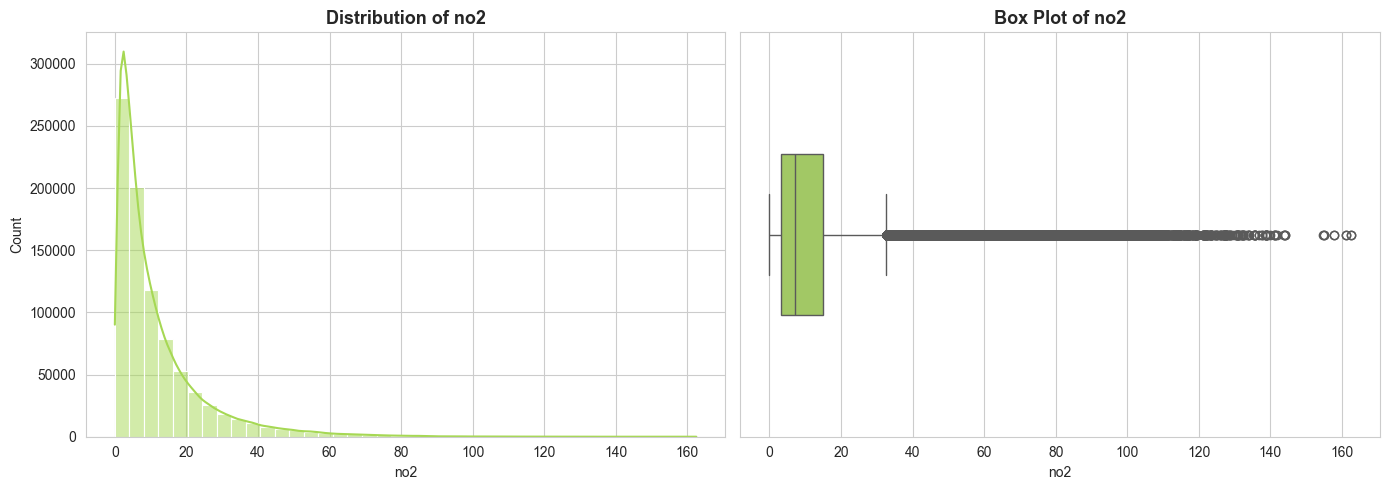

In [30]:
plot_numerical_distribution_and_boxplot(numeric_cols[12], 12)

**In Summary:**
- The distribution of `no2` is **strongly right-skewed**, with most observations concentrated at **low NO₂ concentrations**, indicating that typical conditions are generally within lower pollution levels.
- The histogram displays a sharp peak near the lower end, while the long right tail reflects **occasional high NO₂ episodes**.
- The box plot reveals numerous **high-value outliers**, suggesting that although elevated NO₂ levels are infrequent, they substantially increase overall variability and may correspond to traffic-related or combustion-driven pollution events.

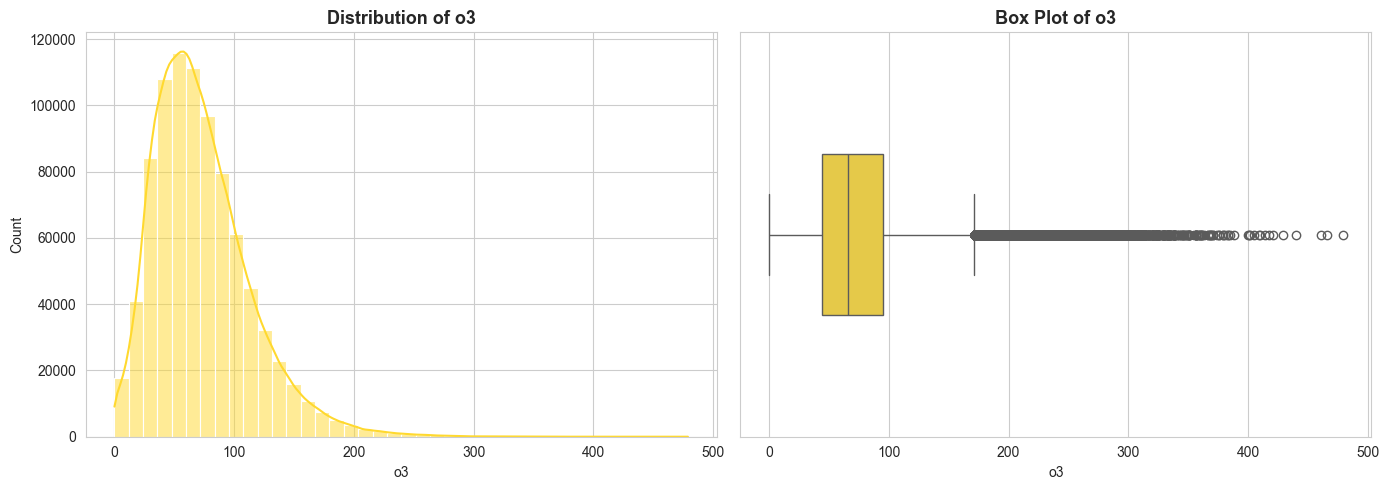

In [31]:
plot_numerical_distribution_and_boxplot(numeric_cols[13], 13)

**In Summary:**
- The distribution of `o3` is **right-skewed**, with most observations concentrated at **moderate ozone concentrations**, while a long right tail reflects higher ozone levels.
- The histogram shows a main peak in the lower-to-mid range, indicating that typical ozone conditions are relatively moderate.
- The box plot reveals several **high-value outliers** (above approximately **200**), suggesting occasional **elevated ozone episodes**, which may be associated with photochemical reactions under strong sunlight.


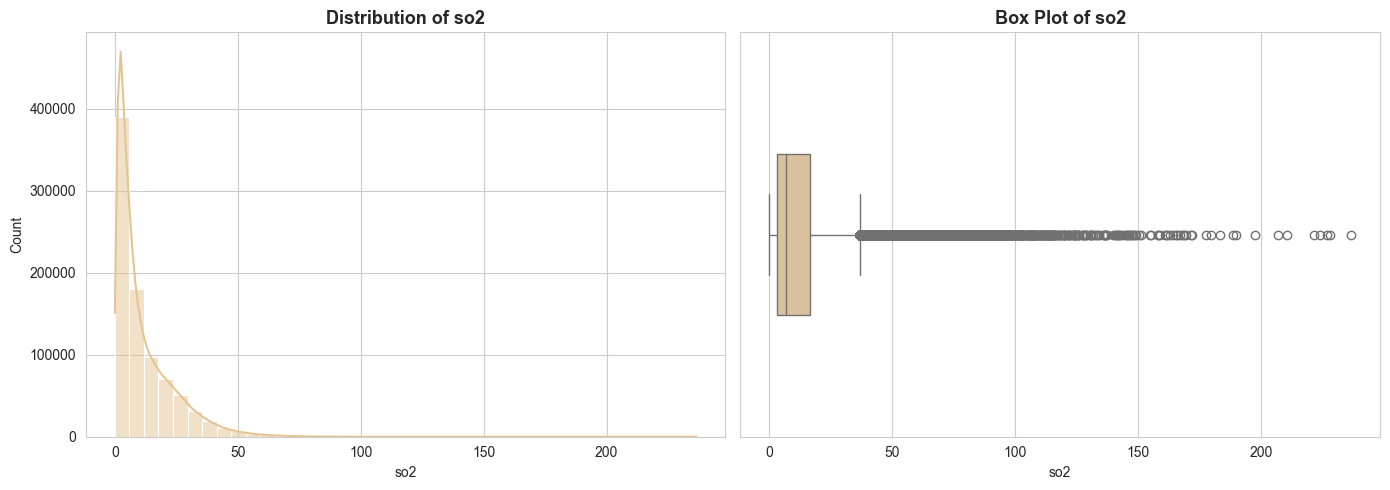

In [32]:
plot_numerical_distribution_and_boxplot(numeric_cols[14], 14)

**In Summary:**
- The distribution of `so2` is **strongly right-skewed**, with most observations concentrated at **very low SO₂ concentrations**, indicating generally low baseline levels.
- The histogram shows a sharp peak near zero, while the long right tail reflects **occasional SO₂ concentration spikes**.
- The box plot reveals numerous **high-value outliers**, suggesting that although elevated SO₂ levels are relatively rare, they significantly contribute to overall variability and may be associated with **industrial emissions or combustion-related events**.

### 2. Categorical Columns Analysis

#### 2.1. Categorical Columns in Dataset

In [33]:
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
print(f"There are {len(categorical_cols)} categorical columns.")
print(categorical_cols)

There are 2 categorical columns.
['city', 'pollution_level']


#### 2.2. Value Distribution

##### The `city` column

In [34]:
unique_citys = df['city'].nunique()
print(f'Amount of city in dataset is: {unique_citys}')

Amount of city in dataset is: 34


**Note:** Due to the purpose of data collection based on 34 provinces and cities, the frequency of occurrence for each province and city should be the same

##### The `pollution_level` column

In [35]:
def plot_categorical_distribution(col_count, col_name, top_n=5):
    top_vals = col_count.nlargest(top_n).index
    top_counts = col_count.nlargest(top_n).values

    plt.figure(figsize=(12, 5))
    sns.barplot(x=top_counts, y=top_vals, hue=top_vals, palette="viridis", legend=False)
    plt.title(f'Most Frequent {col_name}', fontsize=15)
    plt.xlabel('Number of Appearances', fontsize=12)
    plt.ylabel(col_name, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

There are 6 unique values in pollution_level column.
Most frequent pollution_level values is: Moderate with 469640 appearances.


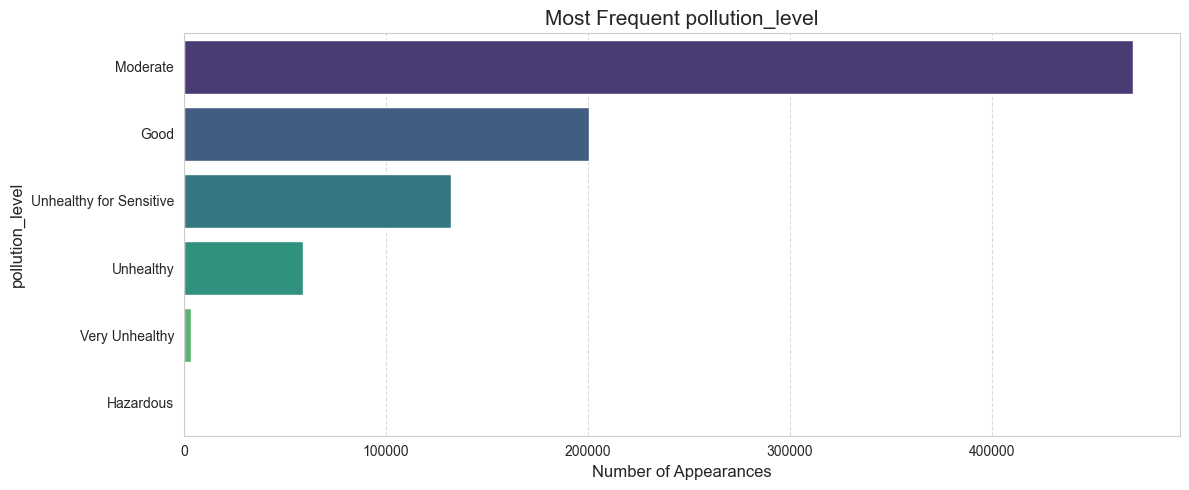

In [36]:
unique_pollution_level = df_processed['pollution_level'].nunique()
pollution_level_counts = df_processed['pollution_level'].value_counts()
print(f'There are {unique_pollution_level} unique values in pollution_level column.')
print(f'Most frequent pollution_level values is: {pollution_level_counts.idxmax()} with {pollution_level_counts.max()} appearances.')
plot_categorical_distribution(pollution_level_counts, 'pollution_level', top_n = 6)

**The air-quality levels are categorized into six pollution tiers based on the AQI**
|**AQI Level**|**AQI Range**|
|-----------|-------------|
|**Good**  |0-50|
|**Moderate**|51-100|
|**Unhealthy for Sensitive** |101-150|
|**Unhealthy**|151-200|
|**Very Unhealthy**  |201-300|
|**Hazardous**|301-500|

**In Summary:**
- The dataset contains **6 distinct pollution levels**, with **`Moderate`** being the most frequent category, accounting for **469,640 observations**, indicating that air quality is most often at a moderate level.
- The combined dominance of **`Moderate`** and **`Good`** categories suggests that **acceptable air quality conditions prevail most of the time**, while severe pollution episodes occur less frequently.
- Higher-risk categories such as **`Very Unhealthy`** and **`Hazardous`** appear **very rarely**, implying that extreme air pollution events are uncommon but potentially critical when they occur.
- This distribution indicates a **class imbalance**, which should be carefully considered in downstream tasks such as classification or risk prediction models.



## IV. Relationships & Correlations

#### 1. Correlation Heatmap 1: Pollutants vs. AQI
- **Variables:** `aqi`, `pm2_5`, `pm10`, `co`, `no2`, `so2`, `o3`
- **Goal:** Verify which pollutant drives the AQI most.


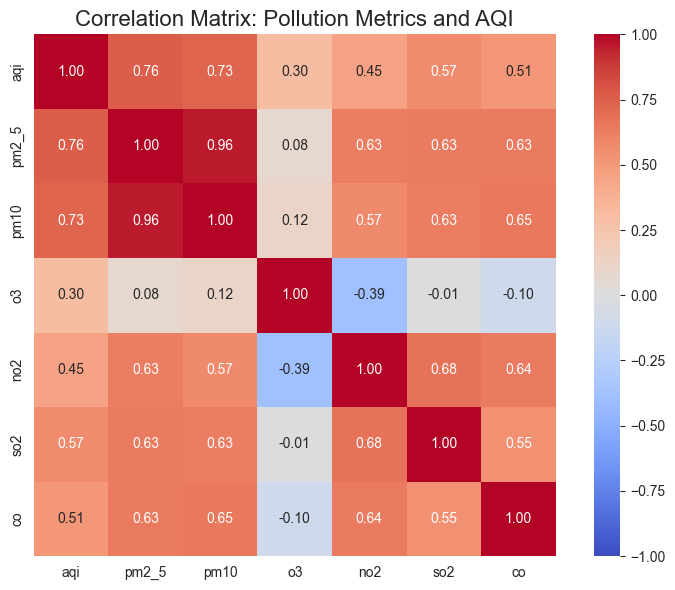

In [37]:
cols_pollution_aqi = ["aqi", "pm2_5", "pm10", "o3", "no2", "so2", "co"]
corr_mat_pollution_aqi = df_processed[cols_pollution_aqi].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat_pollution_aqi, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix: Pollution Metrics and AQI", fontsize=16)
plt.tight_layout()
plt.show()

**Key Insights on AQI Correlations**
- **PM2.5 (0.76) and PM10 (0.73)** show the strongest correlations with AQI $\to$ fine and coarse particulate matter are the primary drivers of air-quality degradation.
- **SO₂ (0.57), CO (0.51), and NO₂ (0.45)** have moderate correlations with AQI $\to$ these gases act as secondary contributors to pollution levels.
- **O₃ (0.30)** has only a weak relationship with AQI $\to$ ozone does not vary strongly in sync with AQI in this dataset.

**Overall:** AQI is mainly driven by PM2.5 and PM10, while SO₂, CO, and NO₂ play supporting roles. Ozone shows minimal influence on AQI in this data.

#### 2. Correlation Heatmap 2: Weather vs. AQI
- **Variables:** `aqi`, `temp`, `humidity`, `rain`, `wind_speed`, `wind_dir`, `pressure`, `cloud`
- **Goal:** Identify which meteorological factors most influence the AQI.

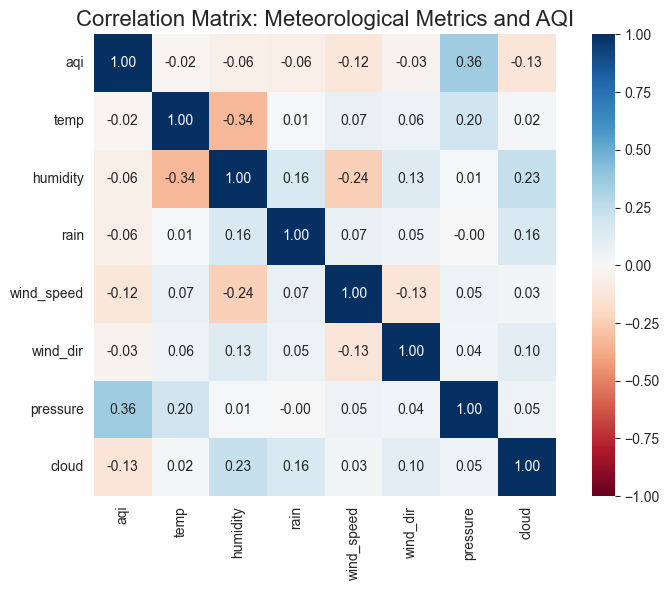

In [38]:
cols_meteorological_aqi = ["aqi", "temp", "humidity", "rain", "wind_speed", "wind_dir", "pressure", "cloud"]
corr_mat_meteorological_aqi = df_processed[cols_meteorological_aqi].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat_meteorological_aqi, annot=True, fmt=".2f", cmap="RdBu", vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix: Meteorological Metrics and AQI", fontsize=16)
plt.tight_layout()
plt.show()

**Key Insights on Weather–AQI Correlations**
- **Pressure (0.36)** shows the strongest correlation with AQI $\to$ high-pressure conditions tend to trap pollutants and worsen air quality.
- **Wind Speed (–0.12)** has a weak negative correlation $\to$ stronger wind slightly helps disperse pollutants.
- **Rainfall (–0.06)** also shows a weak negative relationship $\to$ rain has a mild cleaning effect on the air.
- **Temperature (–0.02)** and **humidity (–0.06)** exhibit near-zero correlations $\to$ limited direct impact on AQI in this dataset.
- **Cloud Cover (–0.13)** has a weak negative correlation $\to$ cloudy conditions may modestly support pollutant dispersion.

**Overall:** Weather variables show generally weak relationships with AQI, except pressure, which stands out as the most influential meteorological factor.

**Note:** Do not discard weather features (like Temperature or Wind Speed) simply because their Pearson correlation coefficient with AQI is low (e.g., 0.1 or -0.15).
- **Non-Linearity:** Pearson correlation only measures linear relationships. Environmental interactions are often complex and non-linear (e.g., Temperature affects AQI in a U-shape pattern: both extreme cold and extreme heat can raise AQI).
- **Model Capability:** Tree-based models (Random Forest, XGBoost) excel at capturing these non-linear patterns and complex interactions (e.g., the combination of Low Wind + High Humidity) that a simple correlation matrix cannot show.
- **Action:** Keep these features for training and rely on Feature Importance scores from the model later to decide on removal.

## V. Meaningful Questions
Our research questions focus on **investigating and validating the key factors that influence air quality**, with the goal of extracting **meaningful insights** that support **evaluations and recommendations regarding the Air Quality Index (AQI)** across different **cities and regions in Vietnam**.

In addition to analyzing external drivers of air quality, our study also addresses **modeling-related challenges** that arise in air pollution forecasting. In particular, we examine how to appropriately handle **PM2.5 and PM10 when these two variables exhibit a strong correlation in time-series prediction tasks**.

Addressing this question is critical, as high correlation between PM2.5 and PM10 may lead to **multicollinearity, redundant information, and unstable model performance**. Therefore, this analysis directly informs our **feature selection, feature engineering, and model design strategies**, contributing to more robust and interpretable forecasting models.

By exploring and answering these questions, the study not only deepens our understanding of **air quality dynamics**, but also enables the creation of **well-structured and non-redundant features** for **fine particulate matter and AQI prediction models**.

We categorize the main determinants of air quality into **three core groups**:

1. **Direct Human Activities**  

2. **Weather and Regional Climate Conditions**  

3. **Pollutants Used in AQI Calculation**  


**Extract Time Components**

In [39]:
df_ques = df_processed.copy()

df_ques["timestamp"] = pd.to_datetime(df_ques["timestamp"])

df_ques["hour"] = df_ques["timestamp"].dt.hour
df_ques["day"] = df_ques["timestamp"].dt.day
df_ques["month"] = df_ques["timestamp"].dt.month
df_ques["year"] = df_ques["timestamp"].dt.year
df_ques["day_of_week"] = df_ques["timestamp"].dt.dayofweek
df_ques["day_name"] = df_ques["timestamp"].dt.day_name()
ids_random = np.random.choice(df_ques.index, size=5, replace=False)
df_ques.loc[ids_random, ["timestamp", "hour", "day", "month", "year", "day_of_week", "day_name"]]

,timestamp,hour,day,month,year,day_of_week,day_name
247543,2023-10-31 08:00:00,8,31,10,2023,1,Tuesday
854240,2025-11-12 20:00:00,20,12,11,2025,2,Wednesday
609211,2025-01-16 13:00:00,13,16,1,2025,3,Thursday
75276,2023-04-03 06:00:00,6,3,4,2023,0,Monday
825476,2025-10-08 14:00:00,14,8,10,2025,2,Wednesday


### 1. Investigating the Impact of Human Activities

#### Q1: Does air quality significantly improve on weekends compared to weekdays?
**Motivation and Hypothesis**

A common assumption is that *air quality improves during weekends* because traffic volume decreases and many factories suspend operations. If human activities are the primary sources of air pollution, a noticeable reduction in AQI should be observed during weekends.

However, this assumption raises an important question: **Does air pollution actually decrease when industrial and commuting activities slow down, or does pollution persist due to accumulated emissions and other dominant factors ?**

**Methodology**  

The following analytical steps were applied:
- Classify days into two categories:  
  - **Weekday**: Monday – Friday  
  - **Weekend**: Saturday – Sunday  

- Compute the **average AQI for each day of the week**  

- Compare weekday–weekend AQI patterns across cities with **high industrial and urban activity** using **line charts**

**Create Features**

In [40]:
df_ques["is_weekend"] = df_ques["day_of_week"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_ques["day_name"] = pd.Categorical(df_ques["day_name"], categories=days_order, ordered=True)

# Select city with have biggest population density
major_cities = ['Hà Nội', 'Bắc Ninh', 'Hồ Chí Minh', 'Biên Hòa', 'Hải Phòng', 'Đà Nẵng']
df_major = df_ques[df_ques["city"].isin(major_cities)].copy()

**Visualize by Chart**

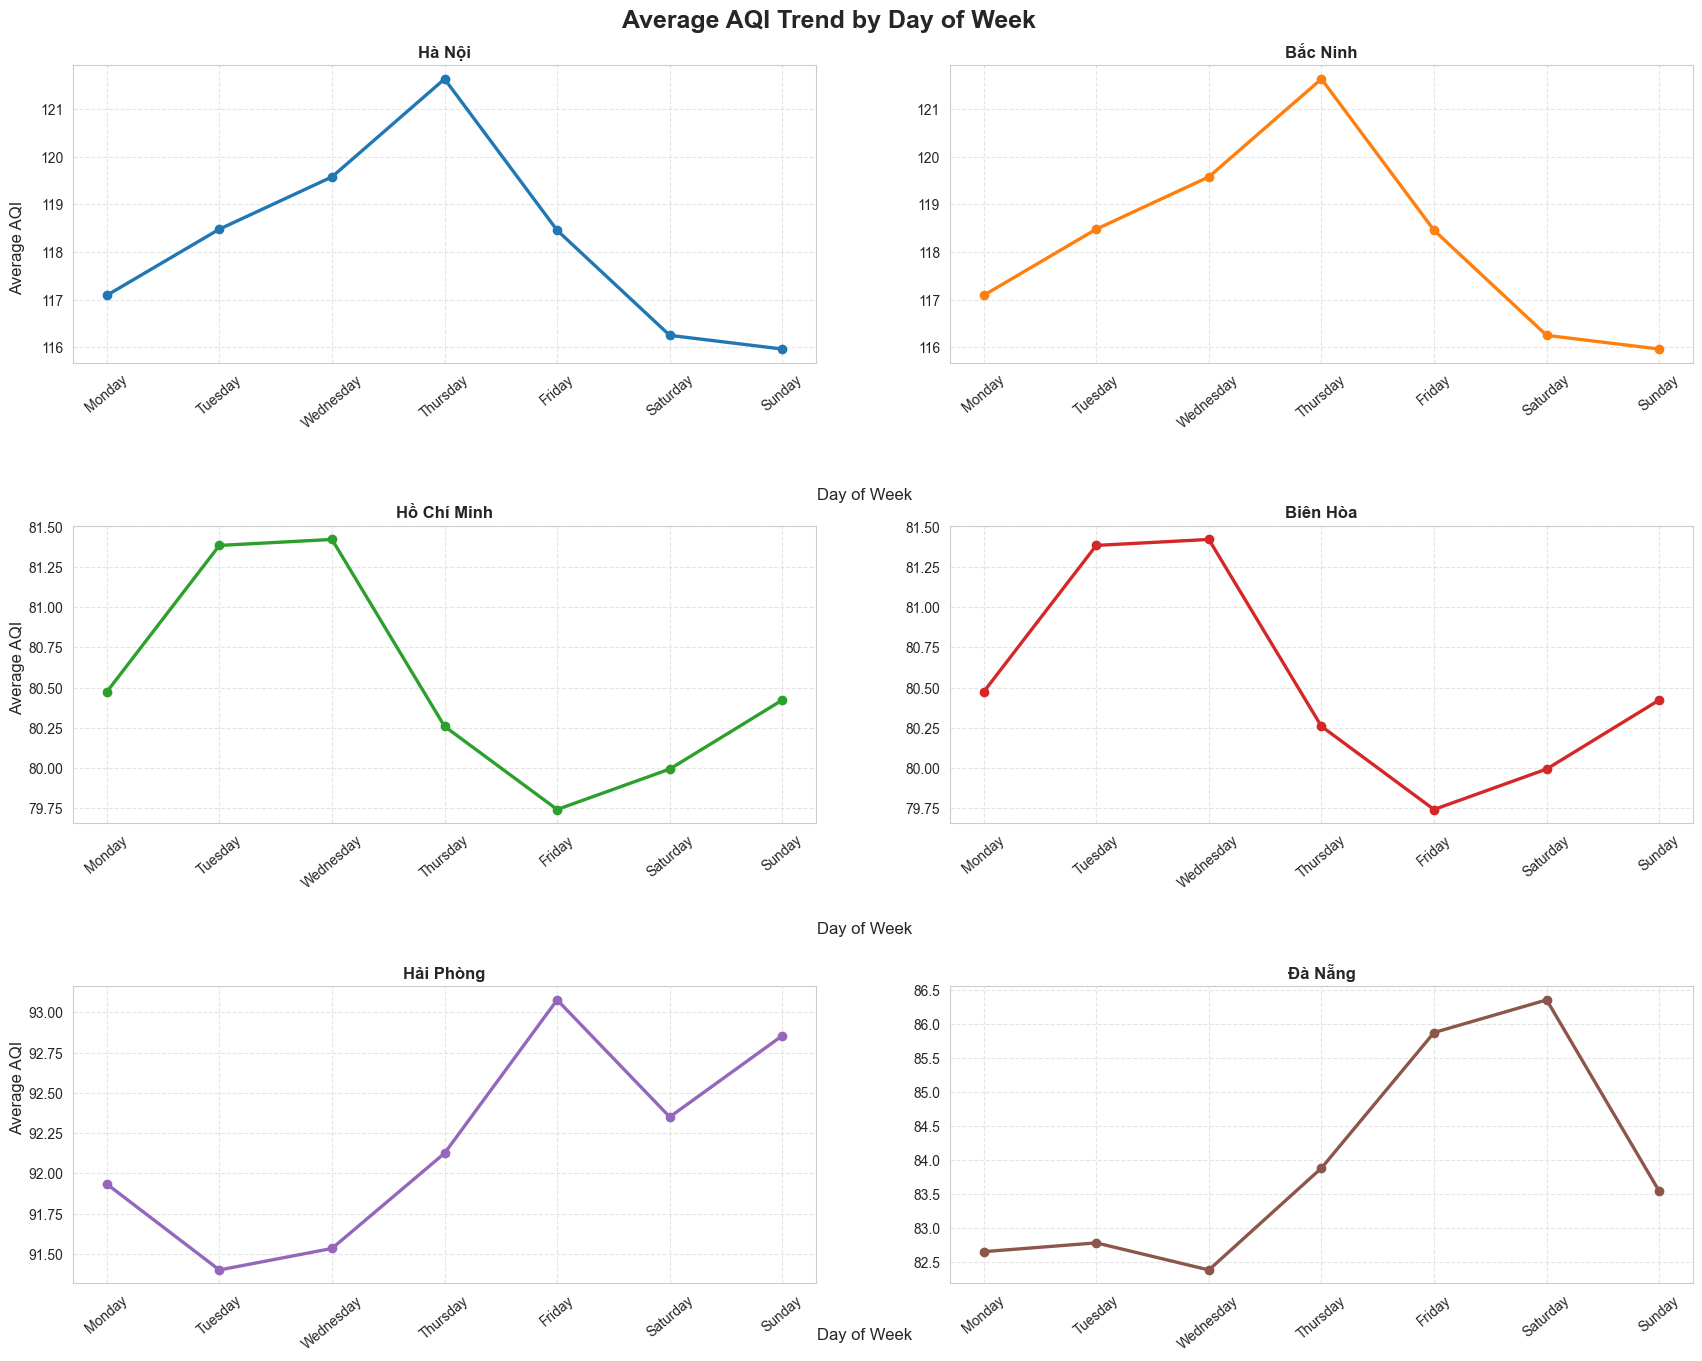

In [41]:
fig, axes = plt.subplots(
    3, 2,
    figsize=(18, 14),
    gridspec_kw={
        "hspace": 0.55,   
        "wspace": 0.18 
    }
)

axes = axes.flatten()

for i, city in enumerate(major_cities):
    city_df = (
        df_major[df_major["city"] == city]
        .groupby("day_name", observed=True)["aqi"]
        .mean()
        .reindex(days_order)
    )

    ax = axes[i]
    ax.plot(
        city_df.index,
        city_df.values,
        marker="o",
        linewidth=2.4,
        color=sns.color_palette("tab10")[i]
    )

    ax.set_title(city, fontsize=12, fontweight="bold")
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.tick_params(axis="x", rotation=40)

# ===== Global title =====
fig.suptitle(
    "Average AQI Trend by Day of Week",
    fontsize=18,
    fontweight="bold",
    y=0.97
)

# ===== Row-level Y labels =====
fig.text(0.045, 0.80, "Average AQI", va="center", rotation="vertical", fontsize=12)
fig.text(0.045, 0.50, "Average AQI", va="center", rotation="vertical", fontsize=12)
fig.text(0.045, 0.20, "Average AQI", va="center", rotation="vertical", fontsize=12)

# ===== Row-level X labels =====
fig.text(0.52, 0.62, "Day of Week", ha="center", fontsize=12)
fig.text(0.52, 0.31, "Day of Week", ha="center", fontsize=12)
fig.text(0.52, 0.02, "Day of Week", ha="center", fontsize=12)

plt.subplots_adjust(left=0.08, right=0.98, bottom=0.06, top=0.93)
plt.show()


**Key Findings:** Overall, most cities exhibit **better air quality during weekends** compared to weekdays.However, the patterns vary significantly across different cities.

**City-Level Analysis:**  

1. **Hà Nội and Bắc Ninh**  
- Air pollution gradually accumulates from the beginning of the week and peaks around **Thursday**.
- A sharp decrease in AQI is observed on **Saturday and Sunday**, indicating a significant environmental recovery when office work and industrial activities slow down.

2. **Biên Hòa and Hồ Chí Minh**   
- A slightly different pattern is observed. AQI peaks around **Wednesday** and reaches its lowest level on **Friday**, before increasing again during the weekend.
- This may be explained by **differences in social behavior**, as residents in Ho Chi Minh City tend to engage in more outdoor and recreational activities during weekends.

3. **Hải Phòng and Đà Nẵng (Counterintuitive Pattern)**  
- A paradoxical pattern emerges in Hai Phong and Da Nang, where **air quality during weekends is worse than on weekdays**.

   - **Hải Phòng**: Strongly influenced by port and logistics activities, which often intensify during weekends.  
   
   - **Đà Nẵng**: A tourism-driven city, where the influx of visitors and vehicles during weekends leads to increased emissions.

**Key Insight:** Air quality is **not inherently determined by whether a day is a weekday or a weekend**.  
Instead, it is driven by the **specific economic structure, human activity patterns, and urban dynamics of each city**.

#### Q2: How about the impact of population density and industrial scale on air quality (AQI) ?

**Motivation and Hypothesis:**
Previous analyses have provided a foundational understanding of how AQI responds to **short-term human activity patterns**, such as weekday–weekend cycles. However, an important **long-term structural question** remains unanswered: Is air quality systematically different between cities with **high population density and intensive industrial activity** and those with **lower density and limited industrial concentration**?

This question challenges a common assumption: *More population and more industry it will has higher AQI.*

While intuitive, this assumption may not always hold in practice. Some highly urbanized and industrialized cities may still maintain relatively stable air quality due to favorable geography, climate, or effective urban planning.


**Methodology**

The analysis follows three main steps:

- **City Grouping Design**  
  - **Industrial Cities**: High population density, strong industrial–service activities, and heavy traffic pressure  
  
  - **Green Cities**: Lower population density, fewer concentrated industrial zones

- Compute the **average AQI for each city**

- Visualize and compare AQI levels across groups using **bar charts**

**Create Groups**

In [42]:
industrial_cities = ["Hà Nội", "Bắc Ninh", "Hải Phòng", "Đà Nẵng", "Thanh Hóa", 
                     "Nha Trang", "Hồ Chí Minh", "Biên Hòa", "Cần Thơ"]

green_cities = ["Lai Châu", "Cao Bằng", "Lạng Sơn", "Quảng Ngãi", "Buôn Ma Thuột", 
                "Pleiku", "Đà Lạt", "Tây Ninh", "Cà Mau"]


mean_industrial = df_ques[df_ques["city"].isin(major_cities)]["aqi"].mean()

mean_green = df_ques[~df_ques["city"].isin(major_cities)]["aqi"].mean()

print(f"Mean AQI industrial cities: {mean_industrial:.2f}")
print(f"Mean AQI green cities: {mean_green:.2f}")

Mean AQI industrial cities: 95.60
Mean AQI green cities: 73.74


**Visualize by Chart**

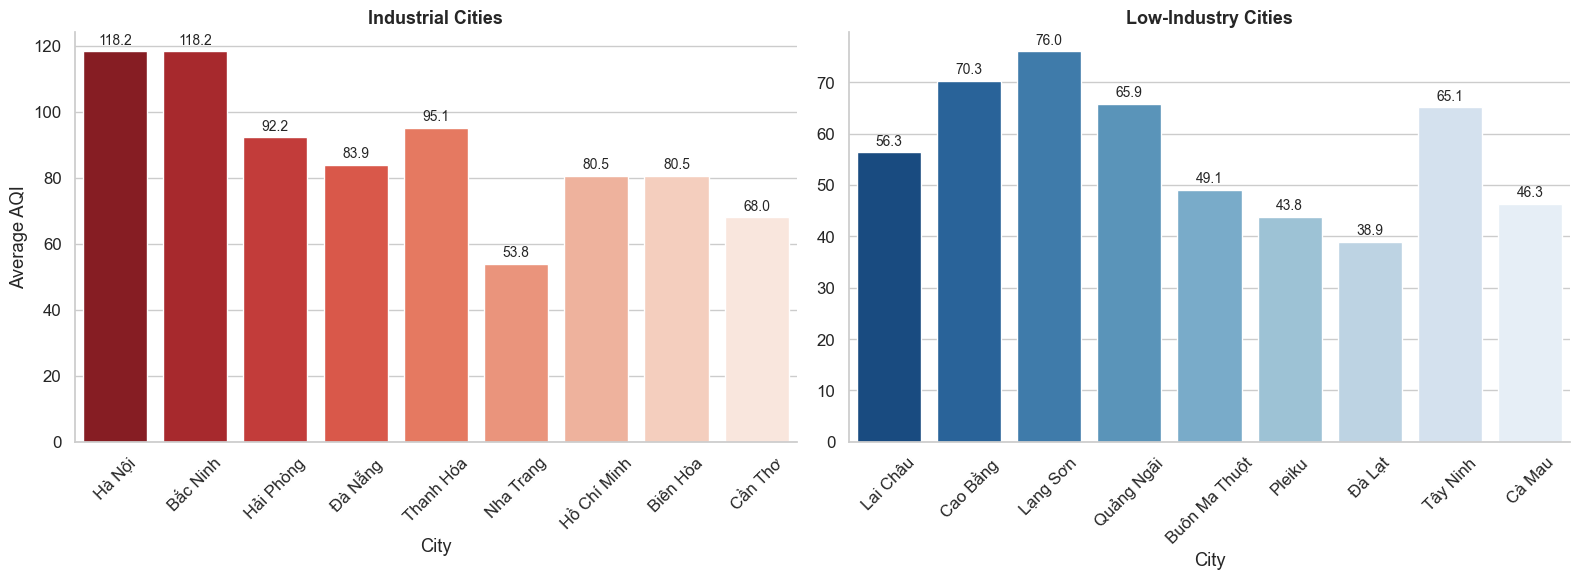

In [43]:
def plot_mean_aqi_two_groups(
    df,
    cities_left,
    cities_right,
    title_left="Group 1",
    title_right="Group 2",
    figsize=(16, 6)
):

    sns.set_theme(style="whitegrid", font_scale=1.1)
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    df_left = df[df["city"].isin(cities_left)].copy()
    mean_left = df_left.groupby("city", as_index=False)["aqi"].mean()

    mean_left["city"] = pd.Categorical(
        mean_left["city"], categories=cities_left, ordered=True
    )
    mean_left = mean_left.sort_values("city")

    ax = axes[0]
    sns.barplot(data=mean_left, x="city",
        y="aqi",
        hue="city",
        palette="Reds_r",
        ax=ax
    )

    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.1f}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="bottom",
            fontsize=10,
            xytext=(0, 3),
            textcoords="offset points"
        )

    ax.set_title(title_left, fontsize=13, fontweight="bold")
    ax.set_xlabel("City")
    ax.set_ylabel("Average AQI")
    ax.tick_params(axis="x", rotation=45)


    df_right = df[df["city"].isin(cities_right)].copy()
    mean_right = df_right.groupby("city", as_index=False)["aqi"].mean()

    mean_right["city"] = pd.Categorical(
        mean_right["city"], categories=cities_right, ordered=True
    )
    mean_right = mean_right.sort_values("city")

    ax = axes[1]
    sns.barplot(
        data=mean_right,
        x="city",
        y="aqi",
        hue="city",
        palette="Blues_r",
        legend=False,
        ax=ax
    )

    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.1f}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="bottom",
            fontsize=10,
            xytext=(0, 3),
            textcoords="offset points"
        )

    ax.set_title(title_right, fontsize=13, fontweight="bold")
    ax.set_xlabel("City")
    ax.set_ylabel("")
    ax.tick_params(axis="x", rotation=45)

    sns.despine()
    plt.tight_layout()
    plt.show()

plot_mean_aqi_two_groups(
    df,
    industrial_cities,
    green_cities,
    title_left="Industrial Cities",
    title_right="Low-Industry Cities"
)


**Key Findings:**  

1. **Clear and Systematic AQI Differences Between City Groups:**

- **Industrial / High-density Cities:**
  - Most cities exhibit **average AQI values above 80**
  - Several pollution hotspots exceed **AQI = 100** (e.g., Hà Nội, Bắc Ninh)

- **Green / Low-density Cities:**
  - AQI levels largely fall within the **40–70 range**
  - Few cities approach high pollution thresholds

These patterns indicate a **strong association between urban structure, industrial scale, and baseline air pollution levels**.

2. **Industrialization Is Not the Only Determining Factor:** 

Several exceptions challenge the simplistic population–industry will has AQI assumption:

- Some industrial cities show **lower-than-expected AQI** (e.g., Nha Trang)
- Some “green” cities still experience **relatively high AQI** (e.g., Lang Son, Cao Bang)

These observations suggest that additional factors play a **critical moderating role**, including:
- Regional climate conditions  
- Topography and ventilation capacity  
- Long-range pollutant transport and accumulation

**Key Insight:**  
- Air quality is shaped not only by population density and industrial scale, but by a **complex interaction between urban structure, economic activity, and natural environmental conditions**.

- There is no single AQI pattern that applies universally across cities. Instead, each city operates on its own **long-term pollution baseline**, determined by both **human activities and natural constraints**.

### 2. Investigating about Weather and Regional Climate Conditions

#### Q3. What is the relationship between **regional climate characteristics** and **air pollution levels (AQI)** across different climate zones in Vietnam ?

**Motivation and Hypothesis:** Previous analyses indicate that **industrial activity alone does not fully explain air pollution patterns** across Vietnamese cities. Given Vietnam’s highly **diversified climate conditions**, it is necessary to examine whether **regional climate characteristics create systematic differences in air quality**.

According to the **National Technical Regulation on Climatic Zoning for Construction**, Vietnam is divided into **seven distinct climate regions**, each with unique meteorological and topographical features.

By analyzing AQI at the **climate-region level**, this approach:
- Reduces bias that may arise from nationwide aggregation  
- Allows a clearer assessment of whether air quality varies significantly across different climatic zones

**Methodology:**  

The analysis was conducted through the following steps:

- **Climate Region Mapping:** A custom mapping function was implemented during preprocessing to assign **34 major cities** into **7 climate regions** based on official zoning standards.

- **Regional AQI Aggregation:** AQI values were grouped by climate region to compute **average AQI per region**, followed by ranking to identify the **top 3 most polluted cities within each region**.

- **Visualization:** A **2×4 grid of subplots** was used to simultaneously display **seven regional AQI rankings**, enabling direct cross-region comparison.

**Create Features**

In [44]:
df_ques['region'] = df_ques['city'].apply(dp.classify_region)

# Set up data
region_stats = df_ques.groupby(['region', 'city'])['aqi'].mean().reset_index()
target_regions = [
    "Vùng I. Tây Bắc", "Vùng II. Đông Bắc", "Vùng III. Bắc Bộ", 
    "Vùng IV. Bắc Trung Bộ", "Vùng V. Nam Trung Bộ", "Vùng VI. Tây Nguyên", "Vùng VII. Nam Bộ"]

**Visualize by Chart**

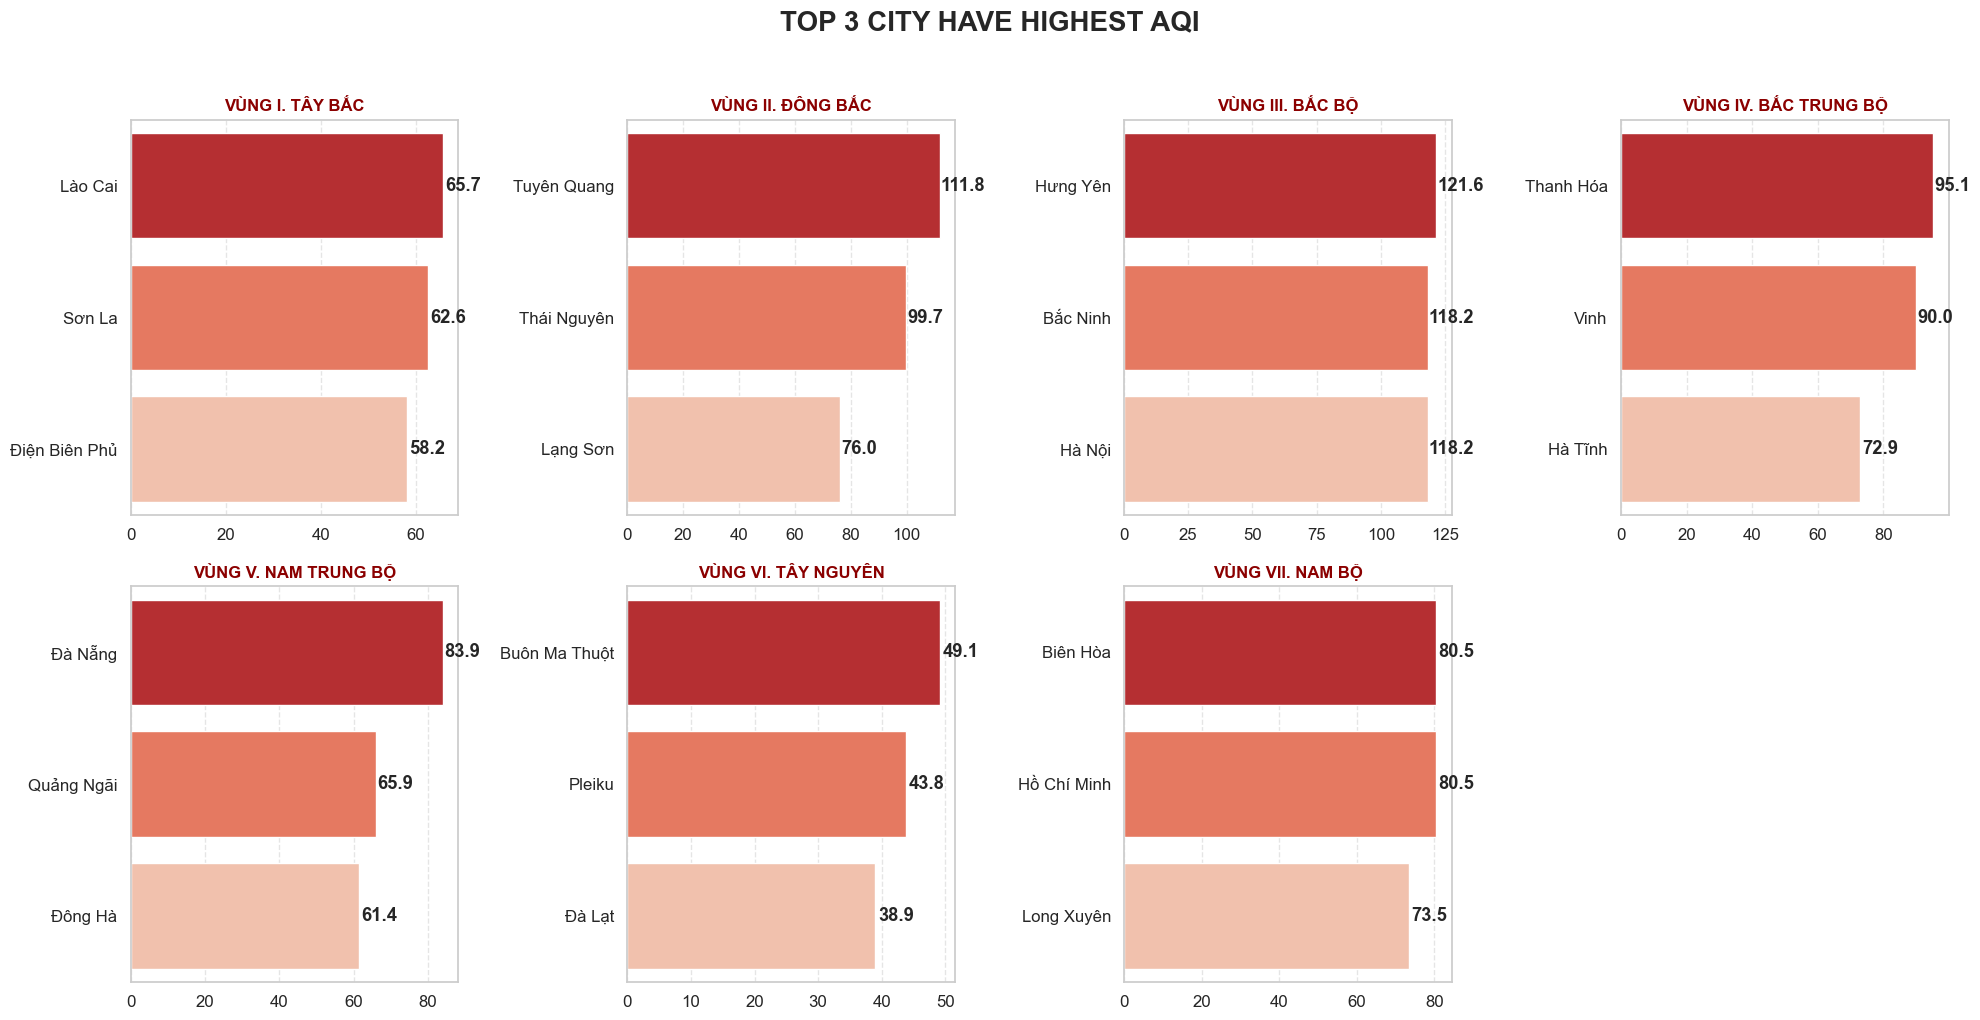

In [45]:
# Draw chart
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('TOP 3 CITY HAVE HIGHEST AQI', fontsize=20, fontweight='bold', y=1.02)
axes_flat = axes.flatten() # Convert into list have 8 elements
for i, region in enumerate(target_regions):
    ax = axes_flat[i]
    
    # Take the data
    data = region_stats[region_stats['region'] == region]
    top_3 = data.sort_values('aqi', ascending=False).head(3)
    
    if not top_3.empty:
        # Draw chart
        sns.barplot(data=top_3, x='aqi', y='city', hue='city', legend=False, ax=ax, palette='Reds_r')
        ax.set_title(region.upper(), fontsize=12, fontweight='bold', color='#8B0000')
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.grid(axis='x', linestyle='--', alpha=0.5)
        
        # Display information
        for index, value in enumerate(top_3['aqi']):
            ax.text(value + 0.5, index, f'{value:.1f}', va='center', fontweight='bold')
    else:
        ax.text(0.5, 0.5, "Don't have data", ha='center', va='center')
        ax.set_title(region)

# Hidden box 8
axes_flat[-1].axis('off')
plt.tight_layout()
plt.show()


**Key Findings:**  

1. **Clear North–South Air Quality Differentiation**    
- The visualization reveals a clear **North–South divide in air pollution levels**.  

- Pollution “hotspots” are concentrated in **Northern climate regions (Regions I, II, III)**, while **Southern and Central Highlands regions (Regions V, VI, VII)** generally exhibit more breathable air quality.

2. **Urban Paradox: Hà Nội vs. Hồ Chí Minh**  
- Despite both being megacities with comparable traffic volumes, **Hồ Chí Minh (Region VII)** consistently records **lower AQI levels** than **Hanoi (Region III)**.

- This contrast suggests that **urban scale alone does not determine air quality**.

**Climate-Based Explanation:**   

1. **Unhealthy for Sensitive Groups (101-150): Northeast & Red River Delta**
* **Data Observations:** The **Northeast** and **Red River Delta** regions exhibit the highest AQI levels in the country, reaching alarming states. Values range from **111.8** in Tuyên Quang and **118.2** in Bắc Ninh, peaking in Hưng Yên at **121.6**.

* **Causes:** These are regions with **high population density**. The critical vulnerability lies in the distinct four-season climate, particularly the cold winter. During winter, **thermal inversion** occurs frequently, creating a layer of cold air trapped near the ground by a layer of warmer air above. This prevents fine dust from industrial zones and urban areas from rising or dispersing.

2. **Moderate (51-100): North Central, South Central & Southern Vietnam**
* **Data Observations:** These three climatic regions maintain moderate AQI levels. Specifically: **South Central Coast (61.4 – 83.9)**, **North Central Coast (72.9 – 95.1)**, and **Southern Vietnam (73.5 – 80.5)**.

* **Causes:** The year-round hot climate facilitates air convection (hot air rises, carrying dust with it). Additionally, sea breezes (in the Central region) and open spaces help disperse pollutants effectively. Although Hồ Chí Minh generates significant emissions, its favorable climate "rescues" it from the hazardous purple AQI levels often seen in Hà Nội.

3. **Good (0-50): Northwest & Central Highlands:**
* **Data Observations:** These regions act as the two **green lungs** of Việt Nam, maintaining very low AQI levels. **Đà Lạt (~38)** and **Pleiku (~43)** are exemplary, with Son La slightly higher at ~62.

* **Causes:** Characterized by "Cool Highlands" and "High Mountain" geography. High altitude combined with low population and industrial density ensures the air remains fresh and unpolluted.

**Key Insight:** Climate characteristics play a **direct and critical role** in shaping air pollution patterns in Việt Nam. Air quality is not solely determined by human activity intensity, but also by **how regional climate conditions amplify or mitigate pollution accumulation**.

#### Q4. The alarming AQI levels in the Northern region primarily stem from internal emission sources or from external pollution?

**Motivation and Hypothesis:**
Previous analyses confirm that **climate plays a dominant role** in shaping air quality and that Northern Vietnam forms a persistent pollution basin. However, cities such as Hà Nội, Bắc Ninh, and Hưng Yên are also characterized by **high population density and intensive industrial activity**.

This raises a critical question:  
Is poor air quality mainly a consequence of **local urban emissions amplified by climate**, or are there **external contributing mechanisms** that sustain pollution levels?

Answering this question requires moving beyond *where pollution occurs* to understanding *how pollution is generated and maintained*.

**Methology:**
Air pollution is the result of multiple interacting mechanisms: **physical dispersion, chemical processes, human behavior, and atmospheric dynamics**.

To disentangle these mechanisms, we propose a **five-layer analytical framework**, where each layer captures a different aspect of pollution generation and transport.

1. **Layer 1 – Atmospheric Dispersion (Wind Effect):**  

- **Method:**  
Correlation between **wind_speed** and **PM2.5** on **dry days (rain = 0)**

- **Rationale:**  
  - Strong wind reducing PM2.5 it means pollution mainly **locally generated**  
  - Strong wind increasing PM2.5 it means wind **transports pollutants from elsewhere**

**Benchmark on Dry days:**  
- Rain causes mechanical washout, masking wind effects  
- Including rain introduces physical noise into wind–PM correlation

**Insight:**  
This is the **most fundamental physical layer** for distinguishing **local vs. transboundary pollution**.


2. **Layer 2 – Particle Nature (PM2.5 / PM10 Ratio):**  

- **Feature:** `pm_ratio = PM2.5 / PM10`

- **Interpretation:**  
  - **PM10 dominance** it means coarse dust (construction, roads) → local mechanical sources  
  - **High PM2.5 ratio** it means fine particles, long atmospheric lifetime → combustion & long-range transport

**Insight:**  
This layer characterizes **whether pollution is primarily coarse and local or fine and regional**.


3. **Layer 3 – Chemical Signature (CO vs. PM2.5):**  

- **Method:** Correlation analysis between **CO** and **PM2.5**

- **Interpretation:**  
  - PM2.5 increases with CO it means traffic & urban combustion  
  - High PM2.5 with low CO it means non-traffic or transported pollution

**Insight:**  
CO acts as a **chemical fingerprint of urban fuel combustion**.

4. **Layer 4 – Human Activity Rhythm (Diurnal Pattern)** 

- **Feature:** `day_part` (rush hours vs. nighttime baseline)

- **Interpretation:**  
  - **Local pollution** prove through “M-shaped” curve (morning & evening peaks)  
  - **Transboundary pollution** prove through flat pollution baseline across 24 hours

5. **Layer 5 – Rain Washout Effect:**  

- **Method:** Assess PM2.5 reduction efficiency during rainy periods

- **Role:**  
  - Not for local/transboundary classification  
  - Used to **validate consistency of other layers**  
  - Helps understand **short-term climatic modulation**

**Create Features**

In [46]:
df_ques["hour"] = df_ques["timestamp"].dt.hour
def get_day_part(h):
    if 5 <= h < 10: return "Morning (Sáng)"
    elif 10 <= h < 15: return "Midday (Trưa)"
    elif 15 <= h < 18: return "Afternoon (Chiều)"
    elif 18 <= h < 23: return "Evening (Tối)"
    else: return "Night (Đêm)"

df_ques["day_part"] = df_ques["hour"].apply(get_day_part)

# Calculate ratio
df_ques['pm_ratio'] = df_ques['pm2_5'] / df_ques['pm10']

**Statistical Comparison & Hypothesis Testing**

In [47]:
def analyze_pollution_sources(city_name, data):
    print(f"\n{'='*70}")
    print(f"DIAGNOSTIC REPORT FOR: {city_name.upper()}")
    print(f"{'='*70}")
    
    score_local = 0
    score_transboundary = 0
    reasons = []
    
    # LAYER 1: ATMOSPHERIC DISPERSION (Wind Speed vs. PM2.5)
    dry_data = data[data['rain'] == 0]
    corr_wind = dry_data['wind_speed'].corr(dry_data['pm2_5'])
    print(f"LAYER 1 (Dispersion): Wind Correlation = {corr_wind:.2f}")
    
    if corr_wind < -0.3:
        score_local += 1
        reasons.append(f"[+] Strong negative correlation ({corr_wind:.2f}) -> Local accumulation (diluted by wind).")
    elif corr_wind > 0.1:
        score_transboundary += 1
        reasons.append(f"[-] Positive correlation ({corr_wind:.2f}) -> Wind carries dust from elsewhere.")
    else:
        reasons.append(f"[?] Weak correlation ({corr_wind:.2f}) -> Complex factors.")

    # LAYER 2: THE NATURE OF DUST (PM2.5 / PM10 Ratio)
    avg_ratio = data['pm_ratio'].mean()
    print(f"LAYER 2 (Composition): PM2.5/PM10 Ratio = {avg_ratio:.2f}")
    
    if avg_ratio > 0.6:
        score_transboundary += 1
        reasons.append(f"[-] High Fine Dust Ratio ({avg_ratio:.2f}) -> Secondary/Aged Aerosol (Long-range).")
    else:
        score_local += 1
        reasons.append(f"[+] Low Ratio ({avg_ratio:.2f}) -> Coarse dust (Construction/Road dust).")

    # LAYER 3: CHEMICAL SIGNATURES (CO vs. PM2.5)
    corr_co = data['co'].corr(data['pm2_5'])
    print(f"LAYER 3 (Chemical): CO Correlation = {corr_co:.2f}")
    
    if corr_co > 0.6:
        score_local += 1
        reasons.append(f"[-] High CO correlation ({corr_co:.2f}) -> Local Combustion (Traffic).")
    else:
        score_transboundary += 1
        reasons.append(f"[+] High PM but low CO -> Long-range Transport.")

    # LAYER 4: HOURLY ACTIVITY (Day Part Analysis)
    day_order = [
        "Morning (Sáng)", 
        "Midday (Trưa)", 
        "Afternoon (Chiều)", 
        "Evening (Tối)", 
        "Night (Đêm)"
    ]

    part_stats = data.groupby('day_part')['pm2_5'].mean()
    part_stats = part_stats.reindex(day_order)
    try:
        val_night = part_stats["Night (Đêm)"]
    except KeyError:
        val_night = 0.1

    active_times = part_stats.drop("Night (Đêm)", errors='ignore')
    peak_val = active_times.max() 
    
    if pd.isna(peak_val): peak_val = 0.1
    if pd.isna(val_night) or val_night == 0: val_night = 0.1
    rush_ratio = peak_val / val_night
    
    print(f"LAYER 4 (Activity): Rush/Night Ratio = {rush_ratio:.2f}")
    
    if rush_ratio > 1.3: # Peak is 30% higher than background
        score_local += 1
        reasons.append(f"[-] Rush hour pollution is {rush_ratio:.1f}x higher than night -> Local Activity.")
    else:
        score_transboundary += 1
        reasons.append(f"[+] Flat pollution profile (Ratio {rush_ratio:.1f}) -> Regional Background.")

    # LAYER 5: RAIN WASHOUT EFFECT
    pm_rainy = data[data['rain'] > 0]['pm2_5'].mean()
    pm_dry = data[data['rain'] == 0]['pm2_5'].mean()
    
    if pd.isna(pm_rainy) or pm_rainy == 0: 
        washout_eff = 0
    else: 
        washout_eff = (pm_dry - pm_rainy) / pm_dry * 100
    
    print(f"LAYER 5 (Rain): Washout Efficiency = {washout_eff:.1f}%")
    reasons.append(f"[Info] Rain reduces {washout_eff:.1f}% of dust concentration.")

    # FINAL VERDICT 
    print("-" * 70)
    final_verdict = "MIXED / UNCLEAR"
    if score_local >= 3: 
        final_verdict = "LOCAL SOURCE DOMINANT"
    elif score_transboundary >= 3: 
        final_verdict = "TRANSBOUNDARY SOURCE DOMINANT"
    
    print(f"VERDICT: {final_verdict} (Local Score: {score_local} - Transboundary Score: {score_transboundary})")
    for r in reasons: 
        print("   " + r)
    print("="*70)
    
    # Pack stats into a dictionary for the visualization function
    stats = {
        'dry_data': dry_data,
        'avg_ratio': avg_ratio,
        'rush_ratio': rush_ratio,
        'part_stats': part_stats,
        'pm_dry': pm_dry,
        'pm_rainy': pm_rainy,
        'washout_eff': washout_eff
    }
    
    return stats

ha_noi = analyze_pollution_sources("Hà Nội", df_ques)
hung_yen = analyze_pollution_sources("Hưng Yên", df_ques)
bac_ninh = analyze_pollution_sources("Bắc Ninh", df_ques)


DIAGNOSTIC REPORT FOR: HÀ NỘI
LAYER 1 (Dispersion): Wind Correlation = -0.20
LAYER 2 (Composition): PM2.5/PM10 Ratio = 0.76
LAYER 3 (Chemical): CO Correlation = 0.63
LAYER 4 (Activity): Rush/Night Ratio = 1.02
LAYER 5 (Rain): Washout Efficiency = 26.9%
----------------------------------------------------------------------
VERDICT: MIXED / UNCLEAR (Local Score: 1 - Transboundary Score: 2)
   [?] Weak correlation (-0.20) -> Complex factors.
   [-] High Fine Dust Ratio (0.76) -> Secondary/Aged Aerosol (Long-range).
   [-] High CO correlation (0.63) -> Local Combustion (Traffic).
   [+] Flat pollution profile (Ratio 1.0) -> Regional Background.
   [Info] Rain reduces 26.9% of dust concentration.

DIAGNOSTIC REPORT FOR: HƯNG YÊN
LAYER 1 (Dispersion): Wind Correlation = -0.20
LAYER 2 (Composition): PM2.5/PM10 Ratio = 0.76
LAYER 3 (Chemical): CO Correlation = 0.63
LAYER 4 (Activity): Rush/Night Ratio = 1.02
LAYER 5 (Rain): Washout Efficiency = 26.9%
------------------------------------------

**Visualize by Chart**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24016\1326491259.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rain_comp, x='Condition', y='PM2.5', ax=axes[2,0], palette=['grey', 'blue'])


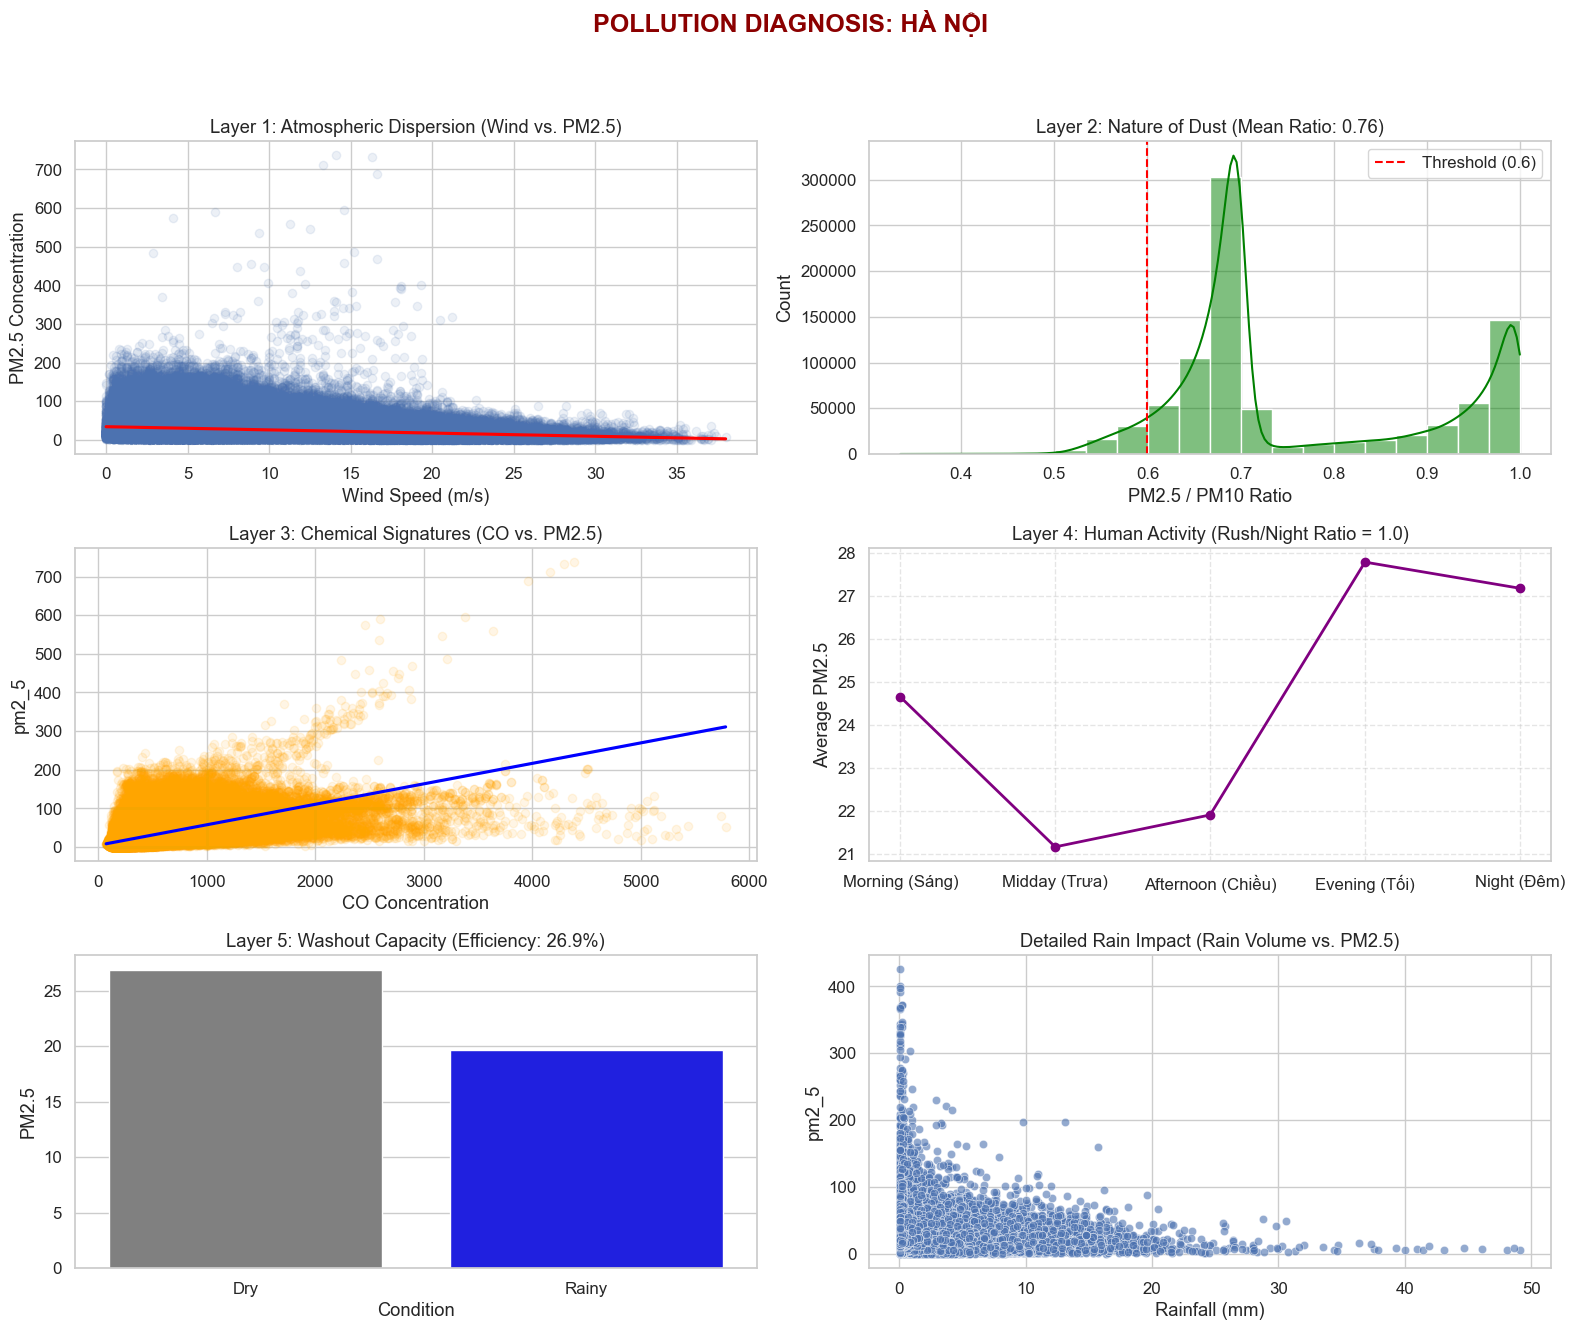

In [48]:
def plot_pollution_diagnosis(city_name, data, stats):
    # Unpack statistics
    dry_data = stats['dry_data']
    avg_ratio = stats['avg_ratio']
    rush_ratio = stats['rush_ratio']
    part_stats = stats['part_stats']
    pm_dry = stats['pm_dry']
    pm_rainy = stats['pm_rainy']
    washout_eff = stats['washout_eff']

    # Setup Canvas
    fig, axes = plt.subplots(3, 2, figsize=(16, 14))
    fig.suptitle(f'POLLUTION DIAGNOSIS: {city_name.upper()}', fontsize=18, fontweight='bold', color='darkred')
    
    # 1. Atmospheric Dispersion 
    sns.regplot(data=dry_data, x='wind_speed', y='pm2_5', ax=axes[0,0], 
                scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
    axes[0,0].set_title('Layer 1: Atmospheric Dispersion (Wind vs. PM2.5)')
    axes[0,0].set_xlabel('Wind Speed (m/s)')
    axes[0,0].set_ylabel('PM2.5 Concentration')

    # 2. Dust Nature
    sns.histplot(data=data, x='pm_ratio', bins=20, kde=True, ax=axes[0,1], color='green')
    axes[0,1].axvline(0.6, color='red', linestyle='--', label='Threshold (0.6)')
    axes[0,1].set_title(f'Layer 2: Nature of Dust (Mean Ratio: {avg_ratio:.2f})')
    axes[0,1].set_xlabel('PM2.5 / PM10 Ratio')
    axes[0,1].legend()

    # 3. Chemical Signatures
    sns.regplot(data=data, x='co', y='pm2_5', ax=axes[1,0], 
                scatter_kws={'alpha':0.1, 'color':'orange'}, line_kws={'color':'blue'})
    axes[1,0].set_title('Layer 3: Chemical Signatures (CO vs. PM2.5)')
    axes[1,0].set_xlabel('CO Concentration')

    # 4. Human Activity Patterns 
    axes[1,1].plot(part_stats.index, part_stats.values, marker='o', linestyle='-', linewidth=2, color='purple')
    axes[1,1].set_title(f'Layer 4: Human Activity (Rush/Night Ratio = {rush_ratio:.1f})')
    axes[1,1].set_ylabel('Average PM2.5')
    axes[1,1].grid(True, linestyle='--', alpha=0.5)

    # 5. Rain Washout Comparison
    rain_comp = pd.DataFrame({'Condition': ['Dry', 'Rainy'], 'PM2.5': [pm_dry, pm_rainy]})
    sns.barplot(data=rain_comp, x='Condition', y='PM2.5', ax=axes[2,0], palette=['grey', 'blue'])
    axes[2,0].set_title(f'Layer 5: Washout Capacity (Efficiency: {washout_eff:.1f}%)')

    # 6. Rain Intensity Detail
    rain_only = data[data['rain'] > 0]
    if not rain_only.empty:
        sns.scatterplot(data=rain_only, x='rain', y='pm2_5', ax=axes[2,1], alpha=0.6)
        axes[2,1].set_title('Detailed Rain Impact (Rain Volume vs. PM2.5)')
        axes[2,1].set_xlabel('Rainfall (mm)')
    else:
        axes[2,1].text(0.5, 0.5, 'No Rain Data Available', ha='center')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Investigate with Hà Nội
plot_pollution_diagnosis('Hà Nội', df_ques, ha_noi)

**Key Findings** 
- Top three city have worst AQI is **not dominated by a single pollution mechanism**.  
- Air pollution results from the **overlap of strong local emissions and a persistent regional pollution background**.

We will conduct a specific analysis of Hà Nội, our capital city, which is currently experiencing alarming Air Quality Index (AQI) levels:

1. **Layer 1 – Wind Dispersion:**  
- Corr(Wind, PM2.5) = **–0.43**

- **Insight:** PM2.5 accumulates during calm conditions  
  - Strong evidence of **local emission sources**  
  - Wind acts as a natural cleaning mechanism

2. **Layer 2 – Particle Composition:** 
- PM2.5 / PM10 = **0.79**

- **Insight:** Dominance of fine particles  
  - Combustion-related and long-range transport  
  - Strong **regional haze background**

3. **Layer 3 – Chemical Signature:**  
- Corr(CO, PM2.5) = **0.63**

- **Insight:** PM2.5 rises in sync with traffic emissions  
  - Urban activities are a **core emission source**

4. **Layer 4 – Diurnal Pattern:**  
- Rush / Night ratio ≈ **1.0**

- **Insight:** No clear rush-hour peaks  
  - Persistent pollution throughout day and night  
  - Transboundary pollution layered over local emissions

5. **Layer 5 – Rain Washout**  
- PM2.5 reduction ≈ **26%**

- **Insight:** Rain insufficient to clean the air  
  - Continuous replenishment from regional or persistent sources

**Key Insight**   
- Hà Nội air pollution is a **hybrid phenomenon**, driven by both **strong local emissions** and a **regional transboundary pollution background**, amplified by unfavorable climatic conditions.

- Hà Nội is neither merely **polluting itself** nor simply a **passive victim of regional air pollution**. The data clearly indicate the **coexistence of strong local emissions and a persistent regional fine particulate background**, causing air pollution to become a **structural and long-lasting phenomenon** rather than a short-term fluctuation.

- This dual-source nature of pollution implies that **isolated or short-term interventions are insufficient**.  
Instead, Hanoi requires **integrated and targeted policy responses** that simultaneously address:
  - Local emission sources (traffic, residential combustion, urban activities), and  
  - Regional pollution dynamics amplified by unfavorable climatic conditions.

Only by acknowledging and tackling both mechanisms can sustainable improvements in air quality be achieved.

- Based on the analytical findings across all research questions, several features were identified as **highly informative for air quality modeling**: `is_rush_hour`, `day_part`, `pm_ratio`
